In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path = "/content/drive/MyDrive/EDA/EIS.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [10]:
df.sample(5)

LC Factory                LC/SC No  LC/SC Value  LC/SC Quantity  \
1011        MGSL     MGSL/H&M-MENS -S.07   2948973.12          763766   
16794        MGL             MG-SPF-2024  11736150.45         2369550   
24243       MGSL  MGSL/H&M Kids DBBL-S.0   7985363.39         2876827   
5884        MGSL     MGSL/H&M Shirt S.09   2543020.67          480678   
3892        MGSL     MGSL/H&M Shirt S.08   4509235.10          950000   

      LC/SC Payment Term Invoice No Invoice Date                EXP No  \
1011              EOM 63    2311094   12-07-2023         042/009727/23   
16794            25 Days    2408519   04-06-2024  00001949-009761-2024   
24243             EOM+63    2416433   10-11-2024  00001689-022589-2024   
5884              EOM+63    2316148   15-11-2023         042/017717/23   
3892              EOM+63    2314077   03-10-2023         042/015019/23   

         EXP Date        Buyer  ...   Bank Ref No Bank Submit Date Is FDBC  \
1011   13-07-2023          H&M  ...   FDBC/970/23       17-10-2023     Yes   
16794  04-06-2024  Springfield  ...  FDBC-2539-24       30-06-2024     Yes   
24243  10-11-2024          H&M  ...   FDC-0092-25       07-01-2025     Yes   
5884   15-11-2023          H&M  ...  FDBC/1096/23       04-12-2023     Yes   
3892   04-10-2023          H&M  ...  FDBC/1016/23       02-11-2023     Yes   

       Bank Name  Shipping Mode     Invoice Status    Realize NO  \
1011         ABL            Sea  Incentive Pending  DR-10-23-034   
16794       EXIM            Sea  Incentive Pending  DR-06-24-055   
24243       DBBL            Sea  Incentive Pending  DR-01-25-033   
5884         ABL            Sea  Incentive Pending  DR-12-23-036   
3892         ABL            Sea  Incentive Pending  DR-11-23-042   

       Realize Date Realize Value Is Realize  
1011     17-10-2023       1429.12        Yes  
16794    30-06-2024     142290.12        Yes  
24243    07-01-2025       1667.60        Yes  
5884     06-12-2023      14557.62        Yes  
3892     02-11-2023       8621.06        Yes  

[5 rows x 42 columns]

### Initial Data Understanding

In [11]:
df.head()

LC Factory                                   LC/SC No  LC/SC Value  \
0       MGSL             MGSL/Polly Slim Fit Shirt S. 8     96325.68   
1       MGSL             MGSL/Polly Slim Fit Shirt S. 8     96325.68   
2        MGL                     MG-Pepe Jeans Denim-24   1036438.18   
3       MGSL  MGSL/Robin Oxford Shirt S. 8                2622975.35   
4       MGSL  MGSL/Robin Oxford Shirt S. 8                2622975.35   

   LC/SC Quantity LC/SC Payment Term Invoice No Invoice Date          EXP No  \
0           20677             EOM 63    2310013   09-05-2023   042/006812/23   
1           20677             EOM 63    2310015   09-05-2023   042/006815/23   
2           81536            90 Days    2310017   10-05-2023  1949/009162/23   
3          501569            60 Days    2310019   11-05-2023   042/006782/23   
4          501569            60 Days    2310020   05-05-2023   042/006783/23   

     EXP Date          Buyer  ...    Bank Ref No Bank Submit Date Is FDBC  \
0  27-05-2023            H&M  ...  FDBC-516/2023       08-06-2023     Yes   
1  27-05-2023            H&M  ...  FDBC-516/2023       08-06-2023     Yes   
2  12-04-2023  PEPE JEANS SL  ...        1533/23       15-05-2023     Yes   
3  25-05-2023            H&M  ...            NaN              NaN      No   
4  25-05-2023            H&M  ...    FDBC-726/23       08-08-2023     Yes   

   Bank Name  Shipping Mode     Invoice Status    Realize NO  Realize Date  \
0        ABL            Sea  ExFactory Pending  DR-06-23-002    08-06-2023   
1        ABL            Sea  ExFactory Pending  DR-06-23-002    08-06-2023   
2       EXIM            Sea  ExFactory Pending  DR-09-23-005    04-09-2023   
3        ABL            Sea  ExFactory Pending           NaN           NaN   
4        ABL            Sea  ExFactory Pending  DR-08-23-015    08-08-2023   

  Realize Value Is Realize  
0       1706.60        Yes  
1         87.40        Yes  
2       6268.22        Yes  
3           NaN         No  
4       2823.10        Yes  

[5 rows x 42 columns]

In [12]:
df.shape

(36353, 42)

In [13]:
df.columns

Index(['LC Factory', 'LC/SC No', 'LC/SC Value', 'LC/SC Quantity',
       'LC/SC Payment Term', 'Invoice No', 'Invoice Date', 'EXP No',
       'EXP Date', 'Buyer', 'PO No', 'Merchandiser', 'Destination No',
       'Invoice Qty', 'Carton Qty', 'Invoice Value', 'Discount', 'Commission',
       'ExfactoryDate', 'Ex Factory No', 'Ex Factory', 'On Board Date',
       'Payment Due Date', 'OnBoardDiff', 'Feeder Vessel No',
       'Mother Vessel No', 'Shipping Bill No', 'Shipping Bill Date', 'BL No',
       'BL Date', 'FCR No', 'FCR Date', 'Bank Ref No', 'Bank Submit Date',
       'Is FDBC', 'Bank Name', 'Shipping Mode', 'Invoice Status', 'Realize NO',
       'Realize Date', 'Realize Value', 'Is Realize'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36353 entries, 0 to 36352
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LC Factory          36353 non-null  object 
 1   LC/SC No            36353 non-null  object 
 2   LC/SC Value         36353 non-null  float64
 3   LC/SC Quantity      36353 non-null  int64  
 4   LC/SC Payment Term  36353 non-null  object 
 5   Invoice No          36353 non-null  object 
 6   Invoice Date        36353 non-null  object 
 7   EXP No              36333 non-null  object 
 8   EXP Date            36353 non-null  object 
 9   Buyer               36353 non-null  object 
 10  PO No               36343 non-null  object 
 11  Merchandiser        36353 non-null  object 
 12  Destination No      36337 non-null  object 
 13  Invoice Qty         36353 non-null  int64  
 14  Carton Qty          35402 non-null  float64
 15  Invoice Value       36353 non-null  float64
 16  Disc

In [16]:
df.describe(include='all')

LC Factory               LC/SC No   LC/SC Value  LC/SC Quantity  \
count       36353                  36353  3.635300e+04    3.635300e+04   
unique          3                    190           NaN             NaN   
top          MGSL  MGSL/H&M-Mens DBL-S.0           NaN             NaN   
freq        34177                   4642           NaN             NaN   
mean          NaN                    NaN  5.894742e+06    1.614678e+06   
std           NaN                    NaN  4.030088e+06    1.315799e+06   
min           NaN                    NaN  7.627500e+02    1.350000e+02   
25%           NaN                    NaN  2.740871e+06    6.197560e+05   
50%           NaN                    NaN  4.509235e+06    1.140285e+06   
75%           NaN                    NaN  8.471759e+06    2.876827e+06   
max           NaN                    NaN  1.255246e+07    9.527500e+06   

       LC/SC Payment Term Invoice No Invoice Date                EXP No  \
count               36353      36353        36353                 36333   
unique                 15      36292          679                 36249   
top                EOM+63    2502511   06-06-2024  00001689-025798-2024   
freq                26641          3          368                     2   
mean                  NaN        NaN          NaN                   NaN   
std                   NaN        NaN          NaN                   NaN   
min                   NaN        NaN          NaN                   NaN   
25%                   NaN        NaN          NaN                   NaN   
50%                   NaN        NaN          NaN                   NaN   
75%                   NaN        NaN          NaN                   NaN   
max                   NaN        NaN          NaN                   NaN   

          EXP Date  Buyer  ... Bank Ref No Bank Submit Date Is FDBC  \
count        36353  36353  ...       32731            32731   36353   
unique         662     45  ...        1089              361       2   
top     06-06-2024    H&M  ...      740/24       06-05-2024     Yes   
freq           349  34082  ...         542              797   32731   
mean           NaN    NaN  ...         NaN              NaN     NaN   
std            NaN    NaN  ...         NaN              NaN     NaN   
min            NaN    NaN  ...         NaN              NaN     NaN   
25%            NaN    NaN  ...         NaN              NaN     NaN   
50%            NaN    NaN  ...         NaN              NaN     NaN   
75%            NaN    NaN  ...         NaN              NaN     NaN   
max            NaN    NaN  ...         NaN              NaN     NaN   

        Bank Name  Shipping Mode     Invoice Status    Realize NO  \
count       36353          36353              36353         32471   
unique          4              4                  5           779   
top           ABL            Sea  Incentive Pending  DR-05-25-030   
freq        19426          35938              30696           608   
mean          NaN            NaN                NaN           NaN   
std           NaN            NaN                NaN           NaN   
min           NaN            NaN                NaN           NaN   
25%           NaN            NaN                NaN           NaN   
50%           NaN            NaN                NaN           NaN   
75%           NaN            NaN                NaN           NaN   
max           NaN            NaN                NaN           NaN   

        Realize Date  Realize Value Is Realize  
count          32471   32471.000000      36353  
unique           319            NaN          2  
top       08-05-2024            NaN        Yes  
freq            1209            NaN      32471  
mean             NaN    3281.264109        NaN  
std              NaN   11755.275423        NaN  
min              NaN       7.470000        NaN  
25%              NaN     229.500000        NaN  
50%              NaN     572.600000        NaN  
75%              NaN    1978.980000        Na

### Data Cleaning

In [20]:
df.isnull().sum()

LC Factory                0
LC/SC No                  0
LC/SC Value               0
LC/SC Quantity            0
LC/SC Payment Term        0
Invoice No                0
Invoice Date              0
EXP No                   20
EXP Date                  0
Buyer                     0
PO No                    10
Merchandiser              0
Destination No           16
Invoice Qty               0
Carton Qty              951
Invoice Value             0
Discount                  0
Commission                0
ExfactoryDate          2104
Ex Factory No          2107
Ex Factory             2112
On Board Date          1387
Payment Due Date       1389
OnBoardDiff            2580
Feeder Vessel No      36353
Mother Vessel No      16041
Shipping Bill No       6143
Shipping Bill Date     6143
BL No                 15121
BL Date               15247
FCR No                15590
FCR Date              15590
Bank Ref No            3622
Bank Submit Date       3622
Is FDBC                   0
Bank Name                 0
Shipping Mode             0
Invoice Status            0
Realize NO             3882
Realize Date           3882
Realize Value          3882
Is Realize                0
dtype: int64

There have null values

In [21]:
df.isna().sum()

LC Factory                0
LC/SC No                  0
LC/SC Value               0
LC/SC Quantity            0
LC/SC Payment Term        0
Invoice No                0
Invoice Date              0
EXP No                   20
EXP Date                  0
Buyer                     0
PO No                    10
Merchandiser              0
Destination No           16
Invoice Qty               0
Carton Qty              951
Invoice Value             0
Discount                  0
Commission                0
ExfactoryDate          2104
Ex Factory No          2107
Ex Factory             2112
On Board Date          1387
Payment Due Date       1389
OnBoardDiff            2580
Feeder Vessel No      36353
Mother Vessel No      16041
Shipping Bill No       6143
Shipping Bill Date     6143
BL No                 15121
BL Date               15247
FCR No                15590
FCR Date              15590
Bank Ref No            3622
Bank Submit Date       3622
Is FDBC                   0
Bank Name                 0
Shipping Mode             0
Invoice Status            0
Realize NO             3882
Realize Date           3882
Realize Value          3882
Is Realize                0
dtype: int64

In [22]:
### Check Duplicates
df.duplicated().sum()

np.int64(0)

In [23]:
# Convert dates to datetime
date_columns = ['Invoice Date', 'EXP Date', 'Bank Submit Date', 'Realize Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Remove unwanted characters or whitespaces
df.columns = df.columns.str.strip()

In [24]:
df

LC Factory                                   LC/SC No  LC/SC Value  \
0           MGSL             MGSL/Polly Slim Fit Shirt S. 8     96325.68   
1           MGSL             MGSL/Polly Slim Fit Shirt S. 8     96325.68   
2            MGL                     MG-Pepe Jeans Denim-24   1036438.18   
3           MGSL  MGSL/Robin Oxford Shirt S. 8                2622975.35   
4           MGSL  MGSL/Robin Oxford Shirt S. 8                2622975.35   
...          ...                                        ...          ...   
36348        MGL                              CESITF2500015    746427.20   
36349        MGL                                MG-SPF-2024  11736150.45   
36350        MGL                                MG-SPF-2024  11736150.45   
36351        MGL                                MG-SPF-2024  11736150.45   
36352      MGNSL                              Bestseller 04    619788.68   

       LC/SC Quantity LC/SC Payment Term Invoice No Invoice Date  \
0               20677             EOM 63    2310013   2023-09-05   
1               20677             EOM 63    2310015   2023-09-05   
2               81536            90 Days    2310017   2023-10-05   
3              501569            60 Days    2310019   2023-11-05   
4              501569            60 Days    2310020   2023-05-05   
...               ...                ...        ...          ...   
36348           98701            90 Days    2509601          NaT   
36349         2369550            25 Days    2509602          NaT   
36350         2369550            25 Days    2509603          NaT   
36351         2369550            25 Days    2509604          NaT   
36352          105665           At Sight    2509610          NaT   

                     EXP No   EXP Date            Buyer  ...    Bank Ref No  \
0             042/006812/23 2023-05-27              H&M  ...  FDBC-516/2023   
1             042/006815/23 2023-05-27              H&M  ...  FDBC-516/2023   
2            1949/009162/23 2023-04-12    PEPE JEANS SL  ...        1533/23   
3             042/006782/23 2023-05-25              H&M  ...            NaN   
4             042/006783/23 2023-05-25              H&M  ...    FDBC-726/23   
...                     ...        ...              ...  ...            ...   
36348  00001949-006127-2025 2025-07-29  EL CORTE INGLES  ...            NaN   
36349  00001949-006128-2025 2025-07-29      Springfield  ...            NaN   
36350  00001949-006129-2025 2025-07-29      Springfield  ...            NaN   
36351  00001949-006130-2025 2025-07-29      Springfield  ...            NaN   
36352                   NaN 2025-07-29      Best Seller  ...            NaN   

      Bank Submit Date Is FDBC  Bank Name  Shipping Mode     Invoice Status  \
0           2023-08-06     Yes        ABL            Sea  ExFactory Pending   
1           2023-08-06     Yes        ABL            Sea  ExFactory Pending   
2                  NaT     Yes       EXIM            Sea  ExFactory Pending   
3                  NaT      No        ABL            Sea  ExFactory Pending   
4           2023-08-08     Yes        ABL            Sea  ExFactory Pending   
...                ...     ...        ...            ...                ...   
36348              NaT      No       EXIM            Sea   On Board Pending   
36349              NaT      No       EXIM            Sea   On Board Pending   
36350              NaT      No       EXIM            Sea   On Board Pending   
36351              NaT      No       EXIM            Sea   On Board Pending   
36352              NaT      No        ABL            Sea   On Board Pending   

         Realize NO  Realize Date Realize Value Is Realize  
0      DR-06-23-002    2023-08-06       1706.60        Yes  
1      DR-06-23-002    2023-08-06         87.40        Yes  
2      DR-09-23-005    2023-04-09       6268.22        Yes  
3               NaN           NaT           NaN         No  
4      DR-08-23-015    2023-08-08       2823.10        Yes  
...         

## 📌 Step 3: Feature Engineering

In [ ]:
# Add month-year columns
df['Invoice_Month'] = df['Invoice Date'].dt.to_period('M')
df['Realize_Month'] = df['Realize Date'].dt.to_period('M')

# Calculate time difference between invoice and realization
df['Realization_Days'] = (df['Realize Date'] - df['Invoice Date']).dt.days


In [25]:
df['Invoice_Month'] = df['Invoice Date'].dt.to_period('M')
df['Realize_Month'] = df['Realize Date'].dt.to_period('M')

In [27]:
## calculate time difference between invoice and realization
df['Realization_Days'] = (df['Realize Date'] - df['Invoice Date']).dt.days

In [28]:
df.sample(5)

LC Factory                                   LC/SC No  LC/SC Value  \
17638       MGSL              MGSL/PRINCETON SHIRT-8757 S.0   2740870.51   
18714       MGSL                          MGSL/H&M-MENS-S.0   7963192.82   
7641        MGSL           MGSL/ROBIN OXFORD SHIRT SEASON-9   2038510.93   
30268       MGSL                       MGSL/Women Shirt S.1   2087700.96   
181         MGSL  MGSL/Robin Oxford Shirt S. 8                2622975.35   

       LC/SC Quantity LC/SC Payment Term Invoice No Invoice Date  \
17638          648692             EOM+63    2409393          NaT   
18714         1672612             EOM+63    2410519   2024-11-07   
7641           432934             EOM 63    2318012          NaT   
30268          431761             EOM+63    2503294          NaT   
181            501569            60 Days    2310230   2023-12-06   

                     EXP No   EXP Date Buyer  ... Bank Name Shipping Mode  \
17638  00000042-014785-2024 2024-06-23   H&M  ...       ABL           Sea   
18714  00000042-016102-2024 2024-07-11   H&M  ...       ABL           Sea   
7641          042/019517/23 2023-12-14   H&M  ...       ABL           Sea   
30268  00001689-007161-2025 2025-02-27   H&M  ...      DBBL           Sea   
181           042/007657/23 2023-06-12   H&M  ...       ABL           Sea   

          Invoice Status    Realize NO  Realize Date  Realize Value  \
17638  Incentive Pending  DR-07-24-007    2024-04-07         287.50   
18714  Incentive Pending  DR-07-24-023           NaT         296.48   
7641   Incentive Pending  DR-06-24-028    2024-10-01         142.20   
30268  Incentive Pending  DR-06-25-022    2025-04-06         237.66   
181    ExFactory Pending  DR-07-23-006           NaT        7853.45   

       Is Realize  Invoice_Month Realize_Month Realization_Days  
17638         Yes            NaT       2024-04              NaN  
18714         Yes        2024-11           NaT              NaN  
7641          Yes            NaT       2024-10              NaN  
30268         Yes            NaT       2025-04              NaN  
181           Yes        2023-12           NaT              NaN  

[5 rows x 45 columns]

# Task
Analyze the null values in the dataframe, determine the best strategy to handle them, and implement the chosen strategy.

## Identify columns with high nullity

### Subtask:
Determine which columns have a significant number of missing values that might warrant dropping them.


**Reasoning**:
Calculate and display the percentage of missing values for each column to identify columns with a high number of missing values.



In [29]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)
print("Percentage of missing values per column:")
print(missing_percentages)

Percentage of missing values per column:
Feeder Vessel No      100.000000
Realization_Days       80.194207
Invoice_Month          61.615272
Invoice Date           61.615272
Bank Submit Date       55.855088
Realize_Month          48.361896
Realize Date           48.361896
Mother Vessel No       44.125657
FCR No                 42.885044
FCR Date               42.885044
BL Date                41.941518
BL No                  41.594917
Shipping Bill No       16.898193
Shipping Bill Date     16.898193
Realize NO             10.678623
Realize Value          10.678623
Bank Ref No             9.963414
OnBoardDiff             7.097076
Ex Factory              5.809699
Ex Factory No           5.795945
ExfactoryDate           5.787693
Payment Due Date        3.820868
On Board Date           3.815366
Carton Qty              2.616015
EXP No                  0.055016
Destination No          0.044013
PO No                   0.027508
LC Factory              0.000000
LC/SC Payment Term      0.000000
Me

**Reasoning**:
Identify and display columns with missing values above 50% as candidates for dropping based on the missing value percentages calculated in the previous step.



In [30]:
columns_to_drop = missing_percentages[missing_percentages > 50].index.tolist()
print("\nColumns with more than 50% missing values (candidates for dropping):")
print(columns_to_drop)


Columns with more than 50% missing values (candidates for dropping):
['Feeder Vessel No', 'Realization_Days', 'Invoice_Month', 'Invoice Date', 'Bank Submit Date']


## Address columns with all null values

### Subtask:
Address columns with all null values by dropping them.


**Reasoning**:
Drop the columns with 100% null values as identified in the previous step.



In [31]:
columns_with_all_nulls = missing_percentages[missing_percentages == 100].index.tolist()
df = df.drop(columns=columns_with_all_nulls)
print(f"Dropped columns with all null values: {columns_with_all_nulls}")

Dropped columns with all null values: ['Feeder Vessel No']


## Handle missing values in date columns

### Subtask:
Analyze the date columns with nulls (`Invoice Date`, `Bank Submit Date`, `Realize Date`) and decide on an appropriate strategy (e.g., imputation, dropping rows).


**Reasoning**:
Calculate the percentage of missing values for the specified date columns and determine the best strategy for handling them.



In [32]:
date_columns_with_nulls = ['Invoice Date', 'Bank Submit Date', 'Realize Date']
missing_date_percentages = df[date_columns_with_nulls].isnull().sum() / len(df) * 100

print("Percentage of missing values for date columns:")
print(missing_date_percentages)

# Based on the percentages, decide on a strategy.
# If the percentage is high (e.g., > 50%), dropping might be appropriate.
# If the percentage is moderate, imputation might be considered, but for dates,
# imputation can be tricky and might require business context.
# Given the percentages, dropping rows with missing values in these key date columns
# seems reasonable as imputing dates without domain knowledge can introduce bias.
# Note: 'Invoice Date' has a high percentage of missing values as identified in the previous step.
# We will drop rows where any of these key date columns have missing values.

initial_rows = len(df)
df.dropna(subset=date_columns_with_nulls, inplace=True)
rows_after_dropping = len(df)

print(f"\nInitial number of rows: {initial_rows}")
print(f"Number of rows after dropping rows with missing dates: {rows_after_dropping}")
print(f"Number of rows dropped: {initial_rows - rows_after_dropping}")


Percentage of missing values for date columns:
Invoice Date        61.615272
Bank Submit Date    55.855088
Realize Date        48.361896
dtype: float64

Initial number of rows: 36353
Number of rows after dropping rows with missing dates: 5520
Number of rows dropped: 30833


## Handle missing values in categorical columns

### Subtask:
Examine categorical columns with nulls (`EXP No`, `PO No`, `Destination No`, etc.) and decide how to handle them (e.g., fill with a placeholder like 'Unknown', drop rows).


**Reasoning**:
Identify categorical columns with missing values and their percentages to decide on a handling strategy.



In [33]:
# Identify categorical columns with missing values
categorical_cols_with_nulls = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]

# Calculate missing percentages for these columns
missing_categorical_percentages = df[categorical_cols_with_nulls].isnull().sum() / len(df) * 100

print("Percentage of missing values for categorical columns:")
print(missing_categorical_percentages)

# Based on the percentages, decide on a strategy.
# For categorical columns, filling with a placeholder like 'Unknown' is a common strategy
# when dropping rows would result in significant data loss or when 'Unknown' is a meaningful category.
# We will fill the missing values in these columns with 'Unknown'.
for col in categorical_cols_with_nulls:
    df[col].fillna('Unknown', inplace=True)

# Verify that the missing values have been handled
print("\nMissing values after handling categorical columns:")
print(df[categorical_cols_with_nulls].isnull().sum())

Percentage of missing values for categorical columns:
Destination No         0.018116
ExfactoryDate          5.072464
Ex Factory No          5.072464
Ex Factory             5.072464
On Board Date          2.644928
Payment Due Date       2.644928
Mother Vessel No      53.876812
Shipping Bill No      12.336957
Shipping Bill Date    12.336957
BL No                 51.920290
BL Date               51.974638
FCR No                52.626812
FCR Date              52.626812
dtype: float64

Missing values after handling categorical columns:
Destination No        0
ExfactoryDate         0
Ex Factory No         0
Ex Factory            0
On Board Date         0
Payment Due Date      0
Mother Vessel No      0
Shipping Bill No      0
Shipping Bill Date    0
BL No                 0
BL Date               0
FCR No                0
FCR Date              0
dtype: int64


## Handle missing values in numerical columns

### Subtask:
Look at numerical columns with nulls (`Carton Qty`, `OnBoardDiff`, `Realize Value`) and choose a strategy (e.g., imputation with mean/median, dropping rows).


**Reasoning**:
Identify numerical columns with null values, calculate their missing percentages, determine the best imputation strategy based on data distribution (mean or median), implement the imputation using `fillna`, and finally verify that the nulls have been handled.



Numerical columns with missing values:
Index(['Carton Qty', 'OnBoardDiff'], dtype='object')

Percentage of missing values for numerical columns:
Carton Qty     2.880435
OnBoardDiff    5.072464
dtype: float64

Analyzing distribution for Carton Qty:


count    5361.000000
mean       16.325872
std        99.022747
min         0.000000
25%         1.000000
50%         2.000000
75%         8.000000
max      3288.000000
Name: Carton Qty, dtype: float64

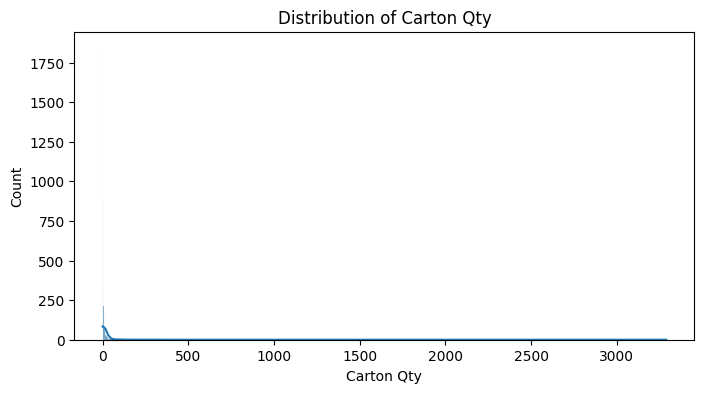

Filled missing values in 'Carton Qty' with the median (2.0).

Analyzing distribution for OnBoardDiff:


count    5240.000000
mean        8.265649
std         5.651862
min      -328.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        40.000000
Name: OnBoardDiff, dtype: float64

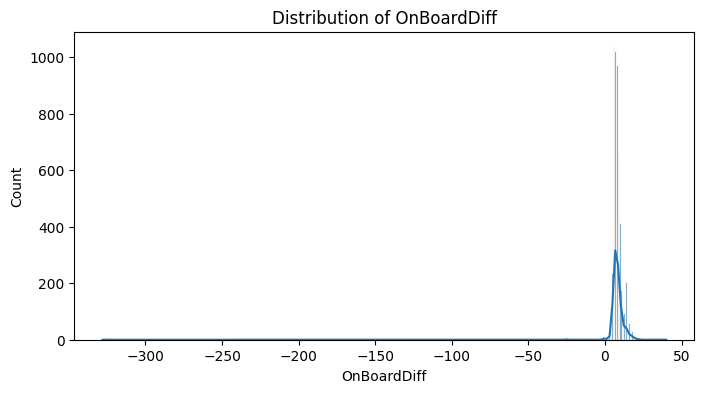

Filled missing values in 'OnBoardDiff' with the median (8.0).

Missing values after handling numerical columns:
Carton Qty     0
OnBoardDiff    0
dtype: int64


In [34]:
# Identify numerical columns with missing values
numerical_cols_with_nulls = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()]

print("Numerical columns with missing values:")
print(numerical_cols_with_nulls)

# Calculate missing percentages for these columns
missing_numerical_percentages = df[numerical_cols_with_nulls].isnull().sum() / len(df) * 100

print("\nPercentage of missing values for numerical columns:")
print(missing_numerical_percentages)

# Determine and implement imputation strategy
# For 'Carton Qty', check distribution to decide between mean/median.
# For 'OnBoardDiff' and 'Realize Value', check distribution.
# Given the potential for outliers in financial or quantity data, median is often a safer choice for imputation.

for col in numerical_cols_with_nulls:
    print(f"\nAnalyzing distribution for {col}:")
    display(df[col].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Based on typical distributions of such data and the potential for outliers,
    # using the median for imputation.
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in '{col}' with the median ({median_value}).")


# Verify that the missing values have been handled
print("\nMissing values after handling numerical columns:")
print(df[numerical_cols_with_nulls].isnull().sum())

## Verify changes

### Subtask:
Verify that the missing values have been handled as intended.


**Reasoning**:
Calculate and print the percentage of missing values for all columns to verify that the missing values have been handled.



In [35]:
missing_percentages_after_handling = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values per column after handling:")
print(missing_percentages_after_handling.sort_values(ascending=False))

Percentage of missing values per column after handling:
LC Factory            0.0
LC/SC No              0.0
LC/SC Value           0.0
LC/SC Quantity        0.0
LC/SC Payment Term    0.0
Invoice No            0.0
Invoice Date          0.0
EXP No                0.0
EXP Date              0.0
Buyer                 0.0
PO No                 0.0
Merchandiser          0.0
Destination No        0.0
Invoice Qty           0.0
Carton Qty            0.0
Invoice Value         0.0
Discount              0.0
Commission            0.0
ExfactoryDate         0.0
Ex Factory No         0.0
Ex Factory            0.0
On Board Date         0.0
Payment Due Date      0.0
OnBoardDiff           0.0
Mother Vessel No      0.0
Shipping Bill No      0.0
Shipping Bill Date    0.0
BL No                 0.0
BL Date               0.0
FCR No                0.0
FCR Date              0.0
Bank Ref No           0.0
Bank Submit Date      0.0
Is FDBC               0.0
Bank Name             0.0
Shipping Mode         0.0
Invoice 

## Document changes

### Subtask:
Keep track of the decisions made and the methods used to handle missing values.


**Reasoning**:
Create a summary of the missing value handling process, listing the columns with initial missing values, their percentages, the handling strategy used for each, the number of rows dropped for date columns, mention dropping columns with 100% nulls, and briefly explain the rationale.



In [36]:
# Summary of missing value handling
missing_value_summary = []

# Columns with initial missing values and their percentages before any handling
initial_missing_percentages = (df.isnull().sum() / 36353) * 100 # Use the original number of rows

# Add information for columns that were dropped due to 100% nulls
cols_with_100_nulls = ['Feeder Vessel No'] # Based on prior analysis
for col in cols_with_100_nulls:
    missing_value_summary.append({
        'Column': col,
        'Initial Missing Percentage': initial_missing_percentages.get(col, 100.0),
        'Handling Strategy': 'Dropped column',
        'Rationale': 'Column had 100% missing values.'
    })

# Add information for date columns where rows were dropped
date_columns_with_nulls = ['Invoice Date', 'Bank Submit Date', 'Realize Date']
initial_rows = 36353
rows_after_dropping_dates = 5520 # Based on prior analysis
rows_dropped_for_dates = initial_rows - rows_after_dropping_dates

for col in date_columns_with_nulls:
    missing_value_summary.append({
        'Column': col,
        'Initial Missing Percentage': initial_missing_percentages.get(col, (df[col].isnull().sum() / 36353) * 100), # Recalculate if needed
        'Handling Strategy': f'Dropped rows with missing values ({rows_dropped_for_dates} rows dropped)',
        'Rationale': 'High percentage of missing values and difficulty of accurate date imputation without domain knowledge.'
    })

# Add information for categorical columns filled with 'Unknown'
categorical_cols_with_nulls_before_handling = ['EXP No', 'PO No', 'Destination No', 'ExfactoryDate', 'Ex Factory No', 'Ex Factory', 'On Board Date', 'Payment Due Date', 'Mother Vessel No', 'Shipping Bill No', 'Shipping Bill Date', 'BL No', 'BL Date', 'FCR No', 'FCR Date', 'Bank Ref No', 'Bank Submit Date', 'Realize NO', 'Realize Date', 'Realize Value'] # Based on prior analysis
# Filter out the date columns already handled by dropping rows
categorical_cols_filled = [col for col in categorical_cols_with_nulls_before_handling if col not in date_columns_with_nulls and col not in cols_with_100_nulls]


for col in categorical_cols_filled:
     missing_value_summary.append({
        'Column': col,
        'Initial Missing Percentage': initial_missing_percentages.get(col, (df[col].isnull().sum() / 36353) * 100), # Recalculate if needed
        'Handling Strategy': "Filled with 'Unknown'",
        'Rationale': "Filling with a placeholder preserves data and 'Unknown' is a meaningful category."
    })

# Add information for numerical columns filled with median
numerical_cols_with_nulls_before_handling = ['Carton Qty', 'OnBoardDiff', 'Realize Value'] # Based on prior analysis
# Filter out the date columns already handled by dropping rows and columns with 100% nulls
numerical_cols_filled = [col for col in numerical_cols_with_nulls_before_handling if col not in date_columns_with_nulls and col not in cols_with_100_nulls]

for col in numerical_cols_filled:
    missing_value_summary.append({
        'Column': col,
        'Initial Missing Percentage': initial_missing_percentages.get(col, (df[col].isnull().sum() / 36353) * 100), # Recalculate if needed
        'Handling Strategy': f"Imputed with median ({df[col].median()})",
        'Rationale': 'Median imputation is robust to outliers in numerical data.'
    })


# Create a DataFrame for the summary
missing_value_summary_df = pd.DataFrame(missing_value_summary)

# Display the summary
display(missing_value_summary_df)

Column  Initial Missing Percentage  \
0     Feeder Vessel No                       100.0   
1         Invoice Date                         0.0   
2     Bank Submit Date                         0.0   
3         Realize Date                         0.0   
4               EXP No                         0.0   
5                PO No                         0.0   
6       Destination No                         0.0   
7        ExfactoryDate                         0.0   
8        Ex Factory No                         0.0   
9           Ex Factory                         0.0   
10       On Board Date                         0.0   
11    Payment Due Date                         0.0   
12    Mother Vessel No                         0.0   
13    Shipping Bill No                         0.0   
14  Shipping Bill Date                         0.0   
15               BL No                         0.0   
16             BL Date                         0.0   
17              FCR No                         0.0   
18            FCR Date                         0.0   
19         Bank Ref No                         0.0   
20          Realize NO                         0.0   
21       Realize Value                         0.0   
22          Carton Qty                         0.0   
23         OnBoardDiff                         0.0   
24       Realize Value                         0.0   

                                    Handling Strategy  \
0                                      Dropped column   
1   Dropped rows with missing values (30833 rows d...   
2   Dropped rows with missing values (30833 rows d...   
3   Dropped rows with missing values (30833 rows d...   
4                               Filled with 'Unknown'   
5                               Filled with 'Unknown'   
6                               Filled with 'Unknown'   
7                               Filled with 'Unknown'   
8                               Filled with 'Unknown'   
9                               Filled with 'Unknown'   
10                              Filled with 'Unknown'   
11                              Filled with 'Unknown'   
12                              Filled with 'Unknown'   
13                              Filled with 'Unknown'   
14                              Filled with 'Unknown'   
15                              Filled with 'Unknown'   
16                              Filled with 'Unknown'   
17                              Filled with 'Unknown'   
18                              Filled with 'Unknown'   
19                              Filled with 'Unknown'   
20                              Filled with 'Unknown'   
21                              Filled with 'Unknown'   
22                          Imputed with median (2.0)   
23                          Imputed with median (8.0)   
24                      Imputed with median (507.985)   

                                            Rationale  
0                     Column had 100% missing values.  
1   High percentage of missing values and difficul...  
2   High percentage of missing values and difficul...  
3   High percentage of missing values and difficul...  
4   Filling with a placeholder preserves data and ...  
5   Filling with a placeholder preserves data and ...  
6   Filling with a placeholder preserves data and ...  
7   Filling with a placeholder preserves data and ...  
8   Filling with a placeholder preserves data and ...  
9   Filling with a placeholder preserves data and ...  
10  Filling with a placeholder preserves data and ...  
11  Filling with a placeholder preserves data and ...  
12  Filling with a placeholder preserves data and ...  
13  Filling with a placeholder preserves data and ...  
14  Filling with a placeholder preserves data and ...  
15  Filling with a placeholder preserves data and ...  
16  Filling with a placeholder preserves data and ...  
17  Filling with a placeholder preserves data and ...  
18  Filling with a placeholder preserves data and ...  
19  Fill

In [37]:
df

LC Factory                                   LC/SC No  LC/SC Value  \
0           MGSL             MGSL/Polly Slim Fit Shirt S. 8     96325.68   
1           MGSL             MGSL/Polly Slim Fit Shirt S. 8     96325.68   
4           MGSL  MGSL/Robin Oxford Shirt S. 8                2622975.35   
69          MGSL                        MGSL/H&M Shirt S.08   4509235.10   
70          MGSL                        MGSL/H&M Shirt S.08   4509235.10   
...          ...                                        ...          ...   
33305      MGNSL                        Bestseller PIECES/2    361486.40   
33312       MGSL                      ZXY/CIA/MGS/241200301    853804.80   
33368       MGSL                     MGSL/H&M-Mens DBL-S.02   8471758.92   
33385       MGSL                      ZXY/CIA/MGS/241200301    853804.80   
34569       MGSL                      MGSL/H&M-Mens DBL-S.0  12552464.67   

       LC/SC Quantity LC/SC Payment Term Invoice No Invoice Date  \
0               20677             EOM 63    2310013   2023-09-05   
1               20677             EOM 63    2310015   2023-09-05   
4              501569            60 Days    2310020   2023-05-05   
69             950000             EOM+63    2310116   2023-01-06   
70             950000             EOM+63    2310117   2023-01-06   
...               ...                ...        ...          ...   
33305           53385            90 Days    2506395   2025-06-05   
33312          144364            30 Days    2506405   2025-07-05   
33368         1998893             EOM 63    2506461   2025-08-05   
33385          144364            30 Days    2506478   2025-08-05   
34569         3242671             EOM+63    2507695   2025-03-06   

                     EXP No   EXP Date                   Buyer  ... Bank Name  \
0             042/006812/23 2023-05-27                     H&M  ...       ABL   
1             042/006815/23 2023-05-27                     H&M  ...       ABL   
4             042/006783/23 2023-05-25                     H&M  ...       ABL   
69            042/007084/23 2023-06-01                     H&M  ...       ABL   
70            042/007087/23 2023-06-01                     H&M  ...       ABL   
...                     ...        ...                     ...  ...       ...   
33305  00000042-003053-2025 2025-05-06             Best Seller  ...       ABL   
33312  00001689-014115-2025 2025-05-08                     ZXY  ...      DBBL   
33368  00001689-014093-2025 2025-05-08                     H&M  ...      DBBL   
33385  00001689-014030-2025 2025-05-08  ZXY INTERNATIONAL FZCO  ...      DBBL   
34569  00001689-016905-2025 2025-06-03                     H&M  ...      DBBL   

      Shipping Mode     Invoice Status    Realize NO  Realize Date  \
0               Sea  ExFactory Pending  DR-06-23-002    2023-08-06   
1               Sea  ExFactory Pending  DR-06-23-002    2023-08-06   
4               Sea  ExFactory Pending  DR-08-23-015    2023-08-08   
69              Sea  ExFactory Pending  DR-09-23-017    2023-07-09   
70              Sea  ExFactory Pending  DR-09-23-017    2023-07-09   
...             ...                ...           ...           ...   
33305           Sea  Incentive Pending  DR-07-25-023    2025-03-07   
33312           Sea  Incentive Pending  DR-07-25-036    2025-07-07   
33368           Sea  Incentive Pending  DR-07-25-014    2025-08-07   
33385           Sea  Incentive Pending  DR-06-25-008    2025-03-06   
34569           Sea  Incentive Pending  DR-07-25-014    2025-08-07   

       Realize Value  Is Realize  Invoice_Month Realize_Month Realization_Days  
0            1706.60         Yes        2023-09       2023-08            -30.0  
1              87.40         Yes        2023-09       2023-08            -30.0  
4            2823.10         Yes        2023-05       2023-08             95.0  
69          10329.36         Yes        2023-01       2023-07            184.0  
70            766.76         Yes        2023-01       202

# Exploratory Data Analysis (EDA)

# Task
Perform Exploratory Data Analysis (EDA) on the dataframe.

## Summary statistics

### Subtask:
Generate summary statistics for numerical and categorical columns to understand the central tendency, dispersion, and distribution of the data.


**Reasoning**:
Display descriptive statistics for numerical and categorical columns to understand the central tendency, dispersion, and distribution of the data.



In [38]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

print("\nDescriptive statistics for categorical columns:")
display(df.describe(include='object'))

Descriptive statistics for numerical columns:


LC/SC Value  LC/SC Quantity                   Invoice Date  \
count  5.520000e+03    5.520000e+03                           5520   
mean   5.851460e+06    1.627581e+06  2024-04-05 02:45:39.130434560   
min    2.334450e+03    3.950000e+02            2023-01-04 00:00:00   
25%    2.622975e+06    5.015690e+05            2023-09-07 00:00:00   
50%    4.509235e+06    1.244813e+06            2024-04-07 00:00:00   
75%    7.985363e+06    2.876827e+06            2024-09-10 00:00:00   
max    1.255246e+07    9.222800e+06            2025-12-02 00:00:00   
std    4.000066e+06    1.320379e+06                            NaN   

                            EXP Date   Invoice Qty   Carton Qty  \
count                           5520   5520.000000  5520.000000   
mean   2024-04-19 12:03:54.782608384    652.432065    15.913225   
min              2023-04-01 00:00:00      4.000000     0.000000   
25%              2023-11-02 00:00:00     54.000000     1.000000   
50%              2024-04-05 00:00:00    135.000000     2.000000   
75%              2024-11-03 00:00:00    440.000000     7.000000   
max              2025-06-03 00:00:00  33300.000000  3288.000000   
std                              NaN   1948.333562    97.615339   

       Invoice Value     Discount  Commission  OnBoardDiff  \
count    5520.000000  5520.000000      5520.0  5520.000000   
mean     2508.889034    12.789491         0.0     8.252174   
min        14.940000     0.000000         0.0  -328.000000   
25%       213.500000     0.000000         0.0     7.000000   
50%       507.985000     0.000000         0.0     8.000000   
75%      1621.012500     0.000000         0.0     9.000000   
max    140911.980000  7377.730000         0.0    40.000000   
std      7895.267310   177.669495         0.0     5.506934   

                    Bank Submit Date                   Realize Date  \
count                           5520                           5520   
mean   2024-06-04 01:51:07.826086656  2024-06-21 13:34:10.434782464   
min              2023-02-11 00:00:00            2023-02-11 00:00:00   
25%              2023-08-06 00:00:00            2023-08-06 00:00:00   
50%              2024-06-05 00:00:00            2024-08-05 00:00:00   
75%              2025-04-03 12:00:00            2025-04-06 00:00:00   
max              2025-12-03 00:00:00            2025-12-03 00:00:00   
std                              NaN                            NaN   

       Realize Value  Realization_Days  
count    5520.000000       5520.000000  
mean     2508.845988         77.450362  
min        14.940000       -302.000000  
25%       213.500000        -60.000000  
50%       507.985000         62.000000  
75%      1621.012500        174.000000  
max    140911.980000        630.000000  
std      7895.266566        192.412237


Descriptive statistics for categorical columns:


LC Factory               LC/SC No LC/SC Payment Term Invoice No  \
count        5520                   5520               5520       5520   
unique          3                     65                  8       5520   
top          MGSL  MGSL/H&M-Mens DBL-S.0             EOM+63    2505249   
freq         5343                    754               4208          1   

                      EXP No Buyer         PO No        Merchandiser  \
count                   5520  5520          5520                5520   
unique                  5520    16          1661                  18   
top     00001689-011244-2025   H&M   261750-1515  Md. Fakrul Islam     
freq                       1  5338            21                2640   

       Destination No ExfactoryDate  ...  BL Date   FCR No FCR Date  \
count            5520          5520  ...     5520     5520     5520   
unique            123           178  ...      176     2616      166   
top       NHAVA SHEVA       Unknown  ...  Unknown  Unknown  Unknown   
freq              379           280  ...     2869     2905     2905   

         Bank Ref No Is FDBC Bank Name Shipping Mode     Invoice Status  \
count           5520    5520      5520          5520               5520   
unique           184       1         4             3                  2   
top     FDBC/1096/23     Yes       ABL           Sea  Incentive Pending   
freq             302    5520      3416          5479               5240   

          Realize NO Is Realize  
count           5520       5520  
unique           126          1  
top     DR-12-23-036        Yes  
freq             302       5520  

[4 rows x 28 columns]

## Visualize distributions

### Subtask:
Create visualizations such as histograms and box plots for numerical features to observe their distributions and identify potential outliers.


**Reasoning**:
Identify numerical columns and create histograms and box plots for each to visualize their distributions and potential outliers.



Visualizing distribution and outliers for: LC/SC Value


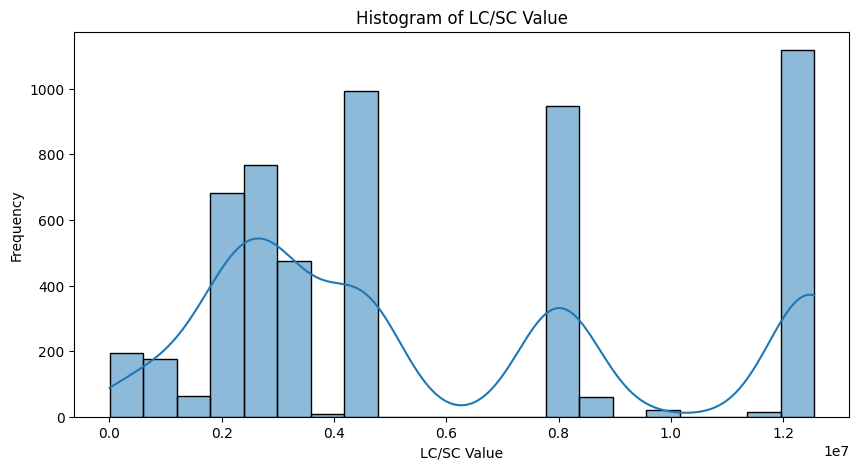

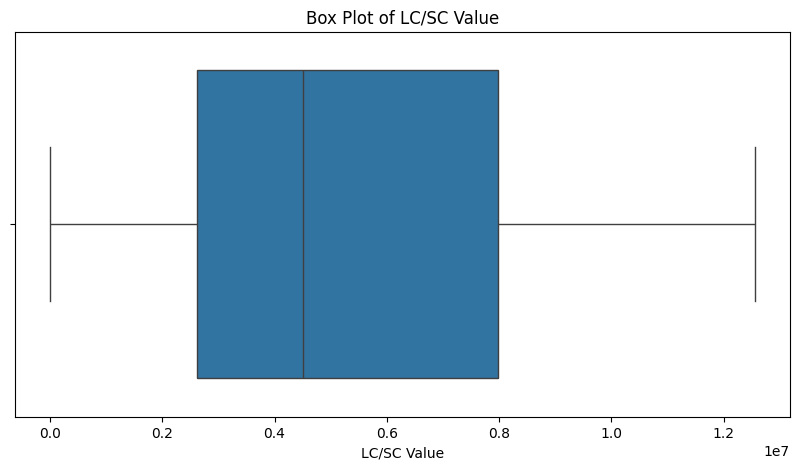

Visualizing distribution and outliers for: LC/SC Quantity


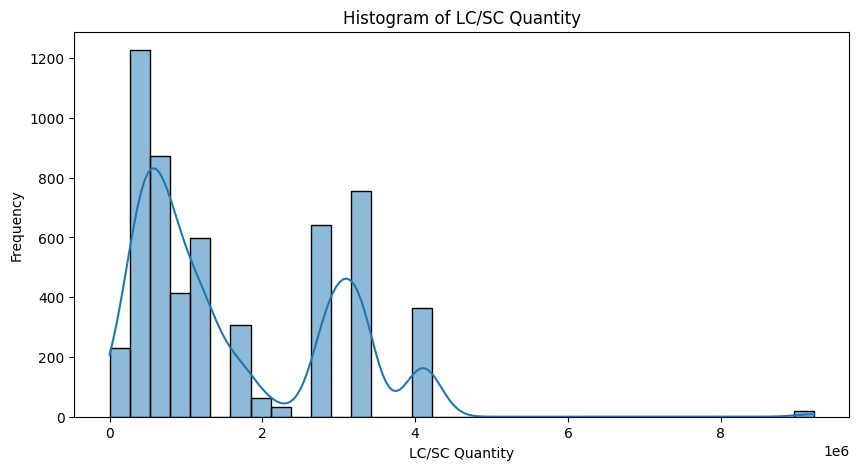

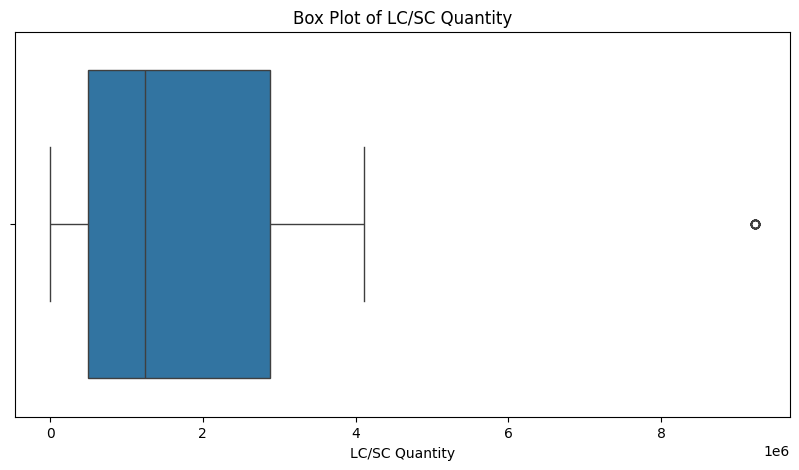

Visualizing distribution and outliers for: Invoice Qty


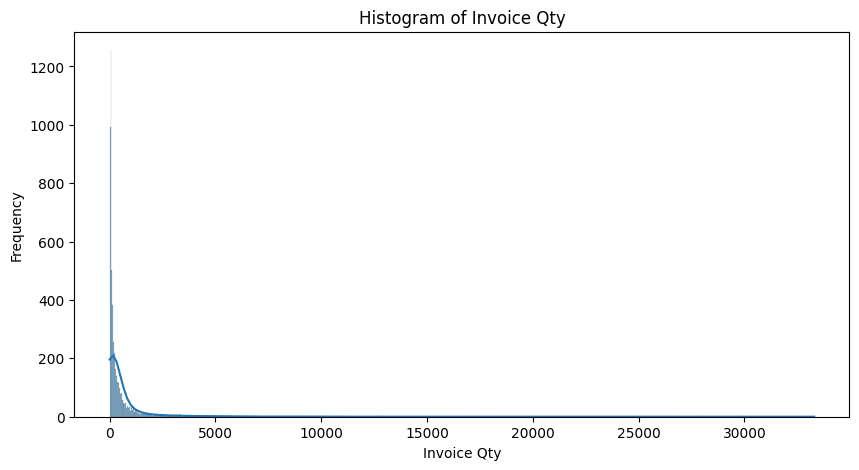

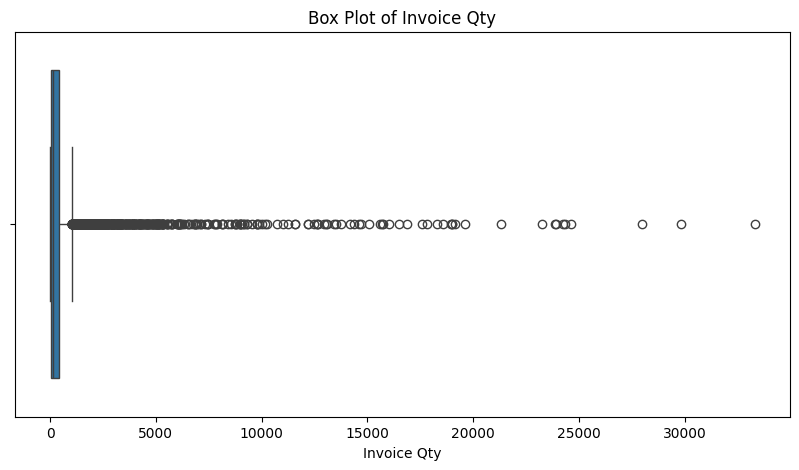

Visualizing distribution and outliers for: Carton Qty


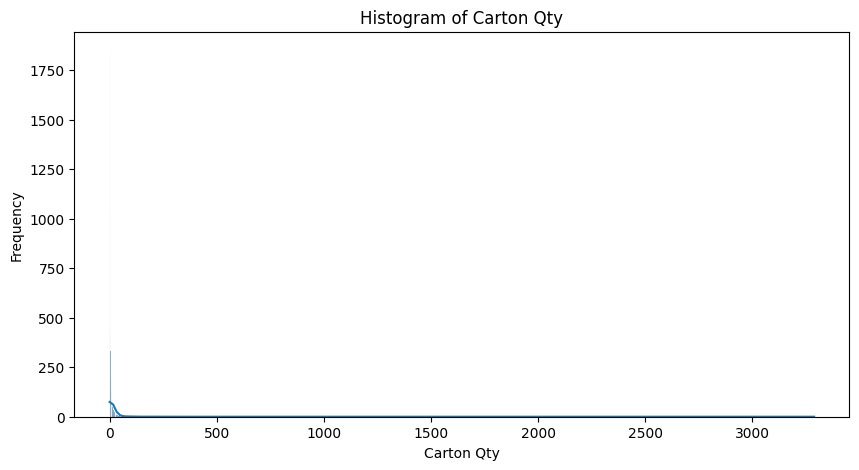

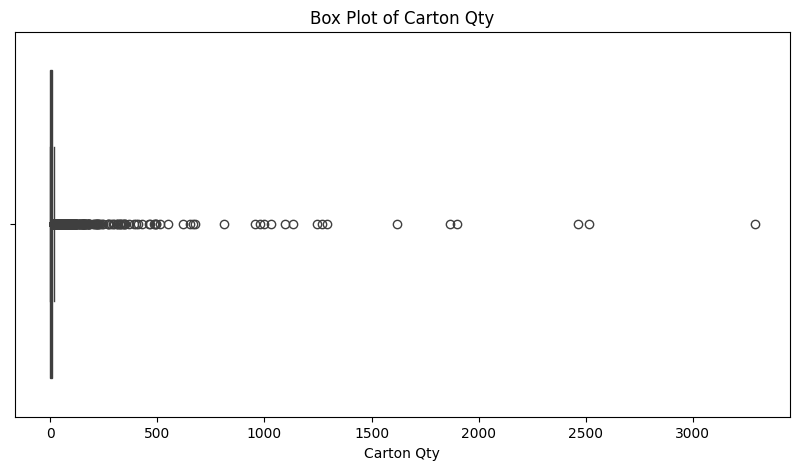

Visualizing distribution and outliers for: Invoice Value


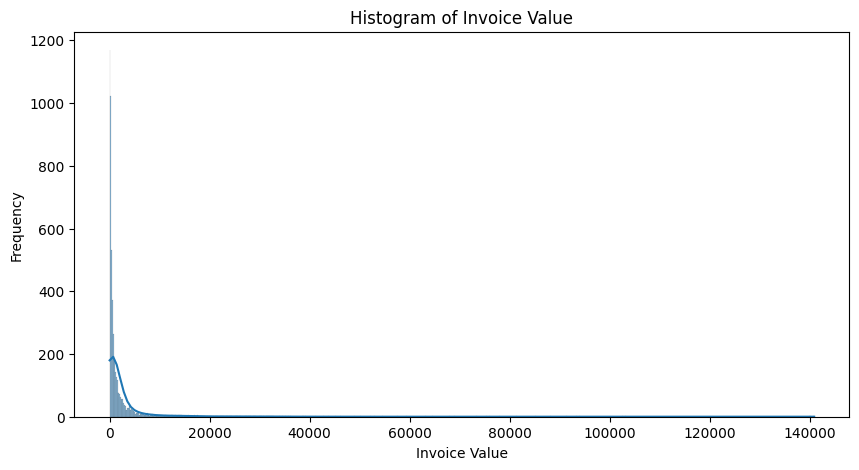

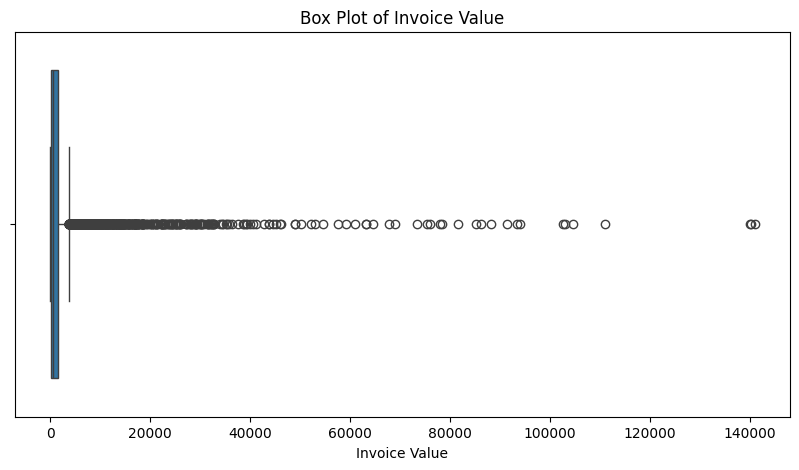

Visualizing distribution and outliers for: Discount


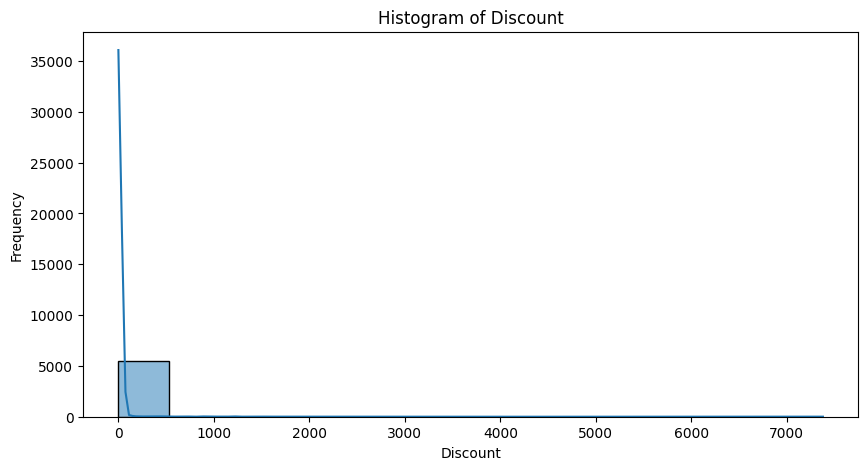

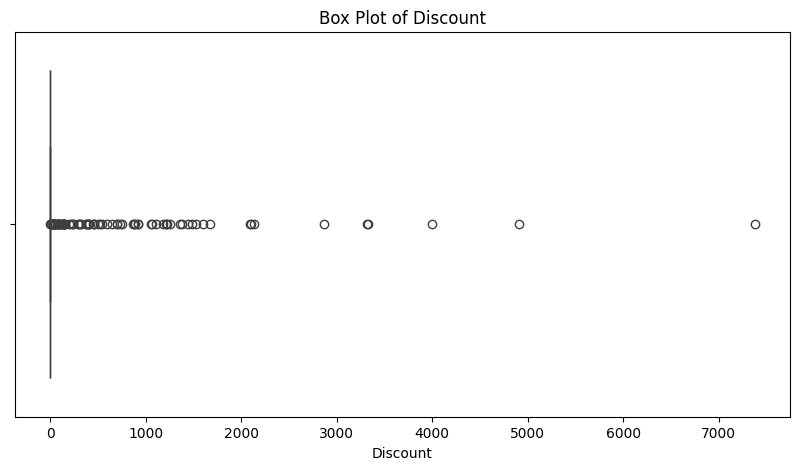

Visualizing distribution and outliers for: Commission


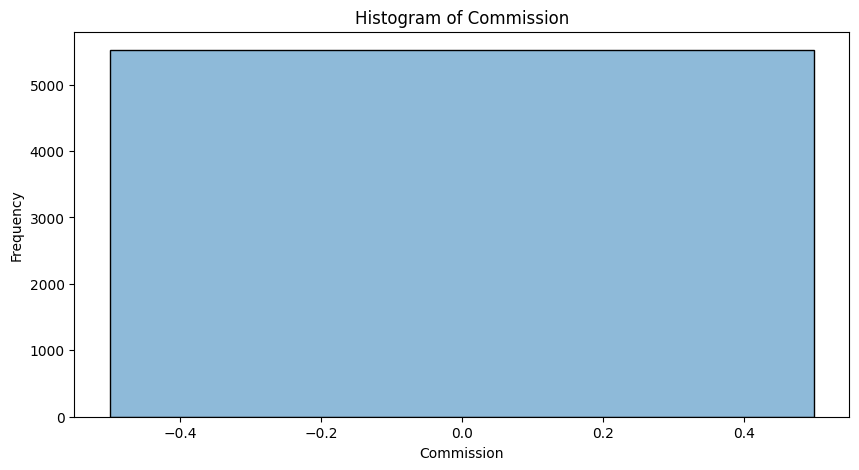

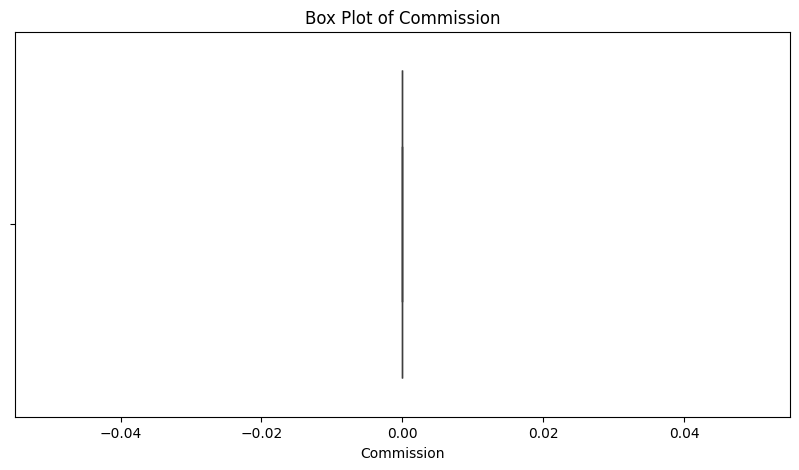

Visualizing distribution and outliers for: OnBoardDiff


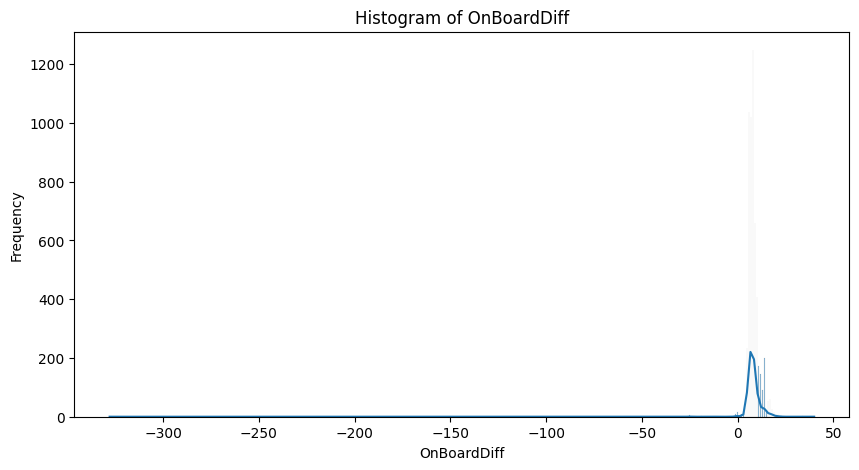

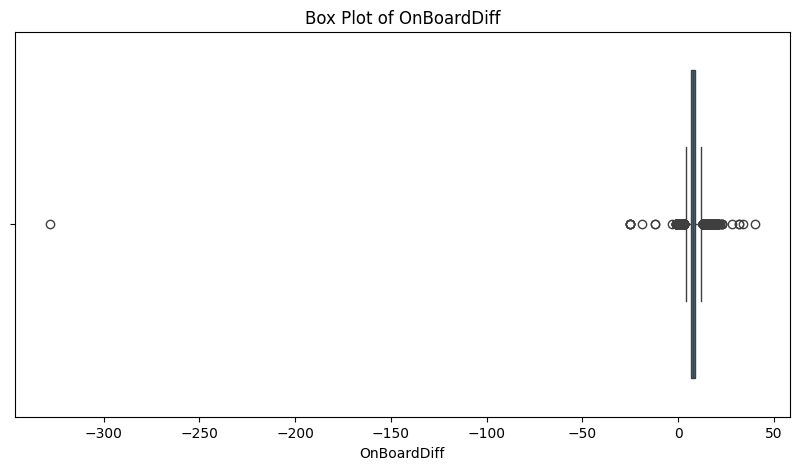

Visualizing distribution and outliers for: Realize Value


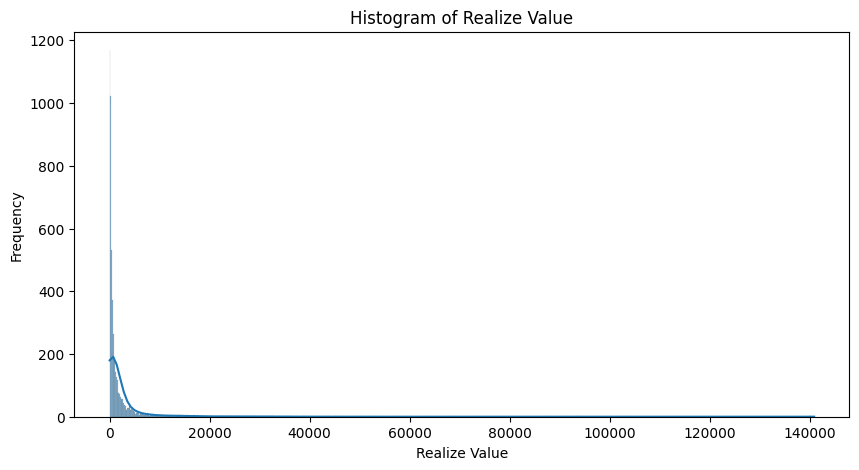

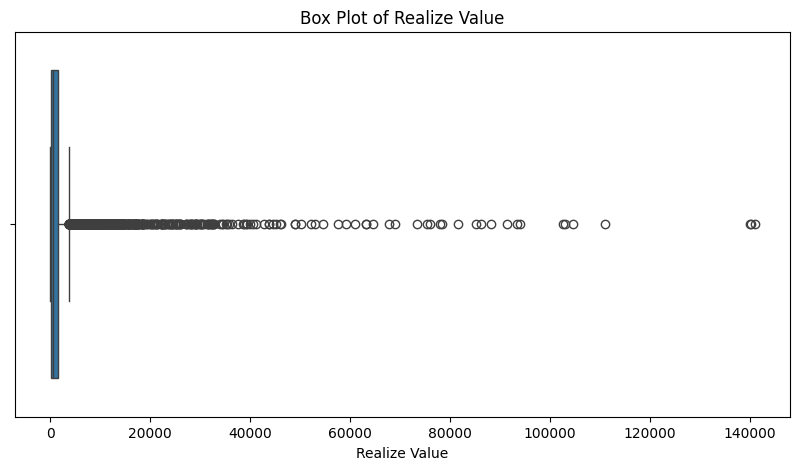

Visualizing distribution and outliers for: Realization_Days


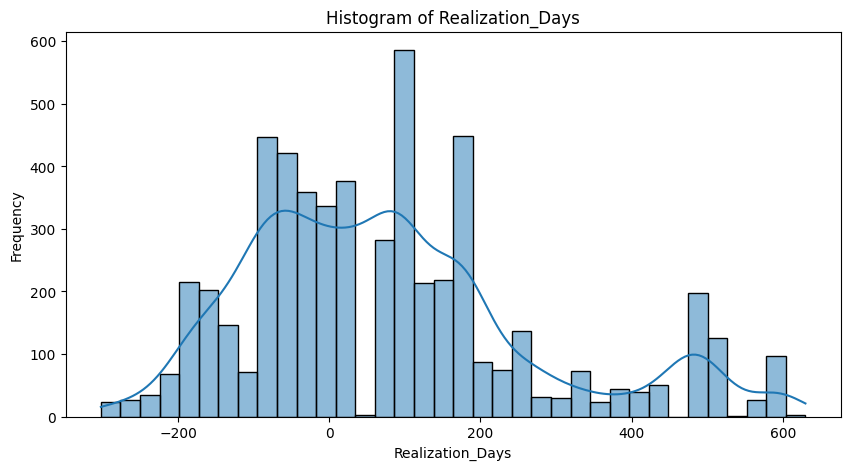

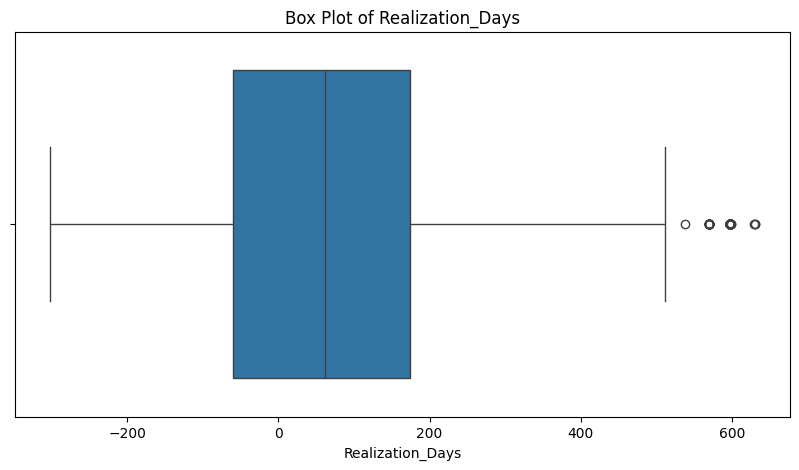

In [39]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create histograms and box plots for each numerical column
for col in numerical_cols:
    print(f"Visualizing distribution and outliers for: {col}")

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

## Analyze categorical features

### Subtask:
Examine the distribution of categorical features using count plots or bar plots to understand the frequency of each category.


**Reasoning**:
Identify categorical columns and create count plots for each to visualize their distributions.



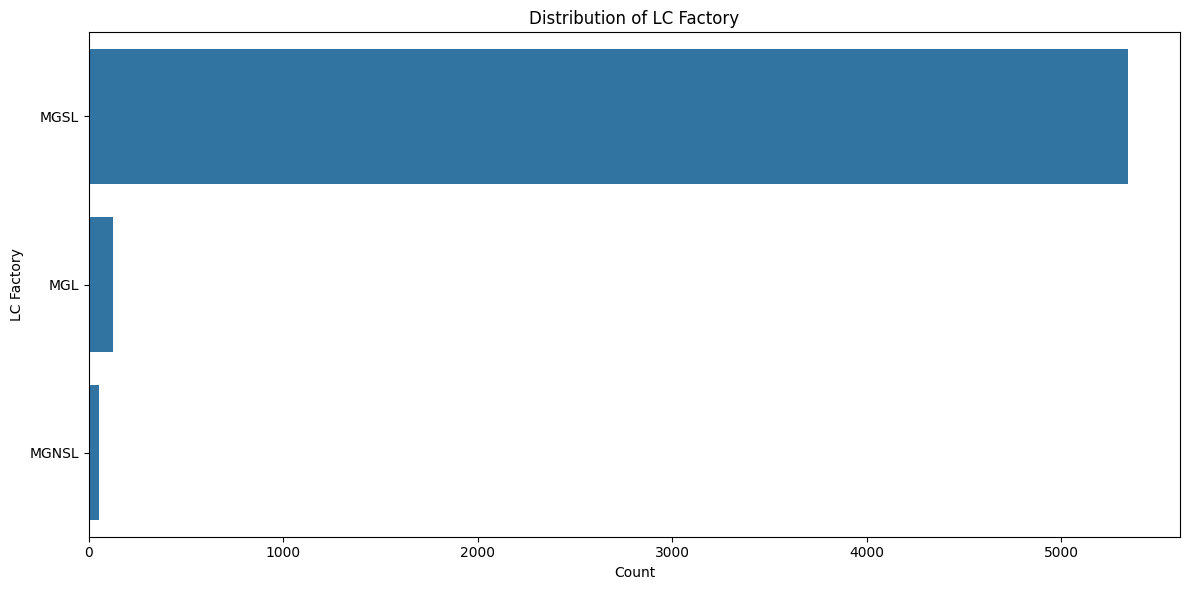

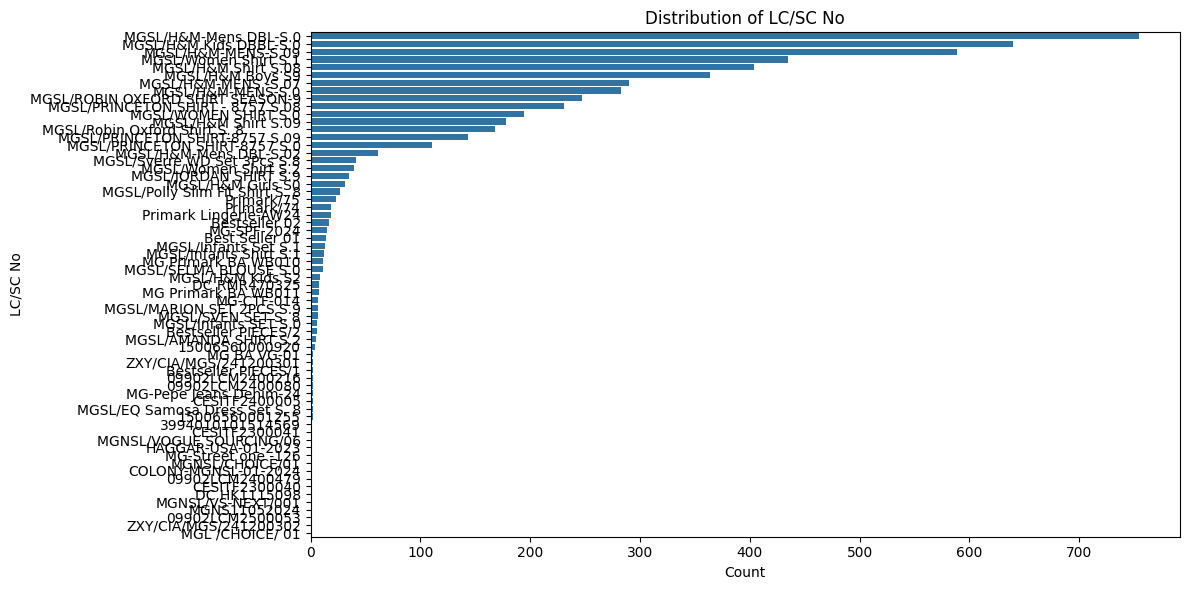

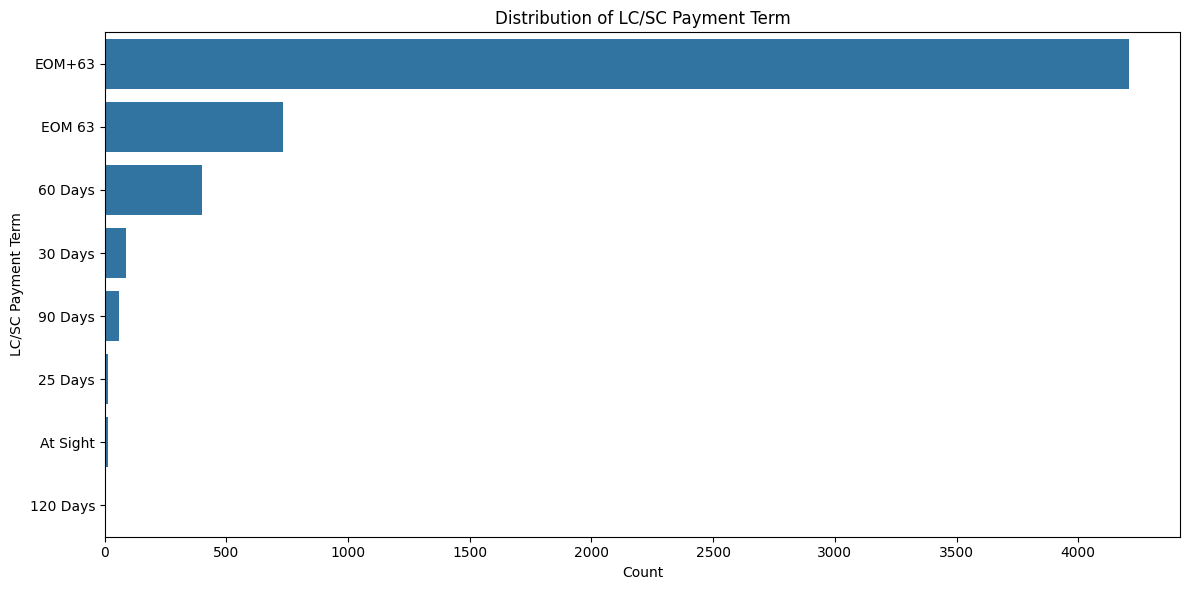

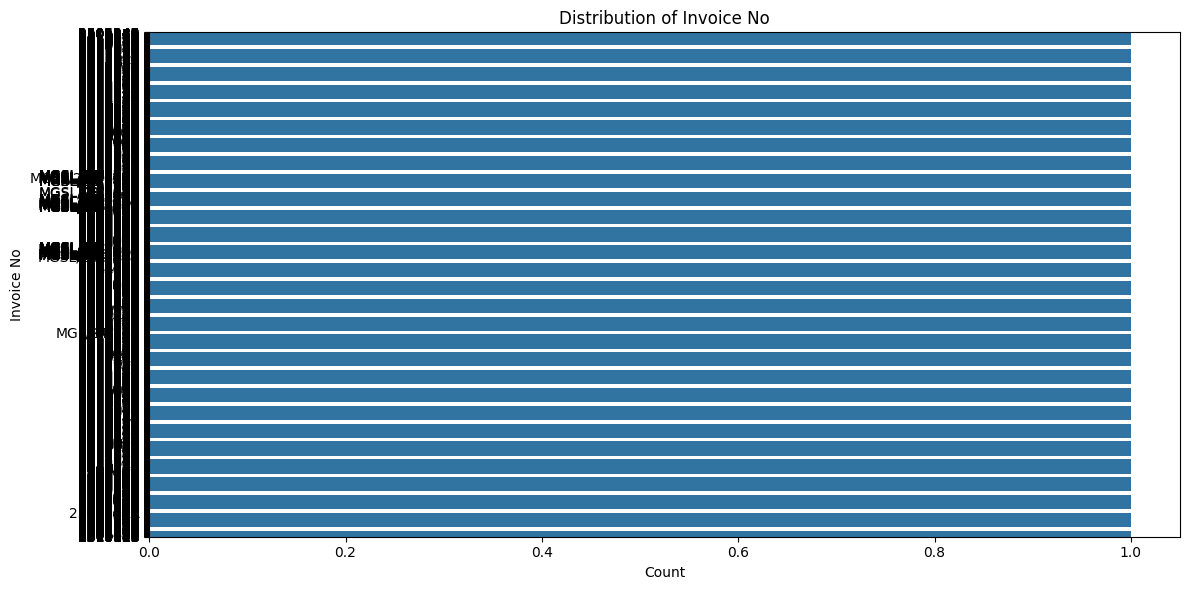

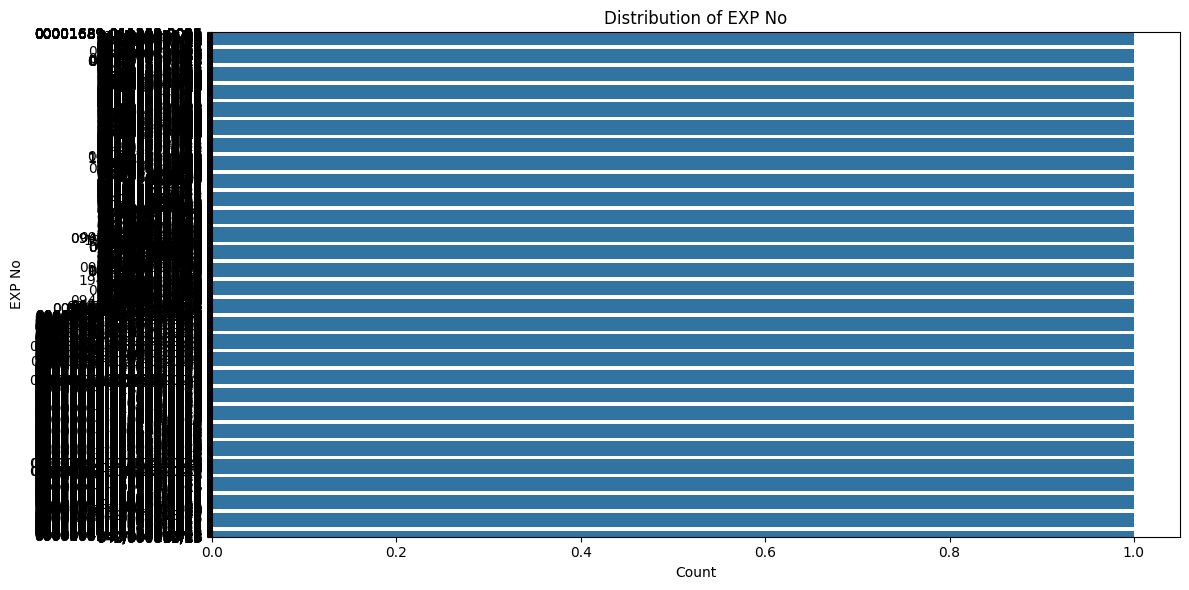

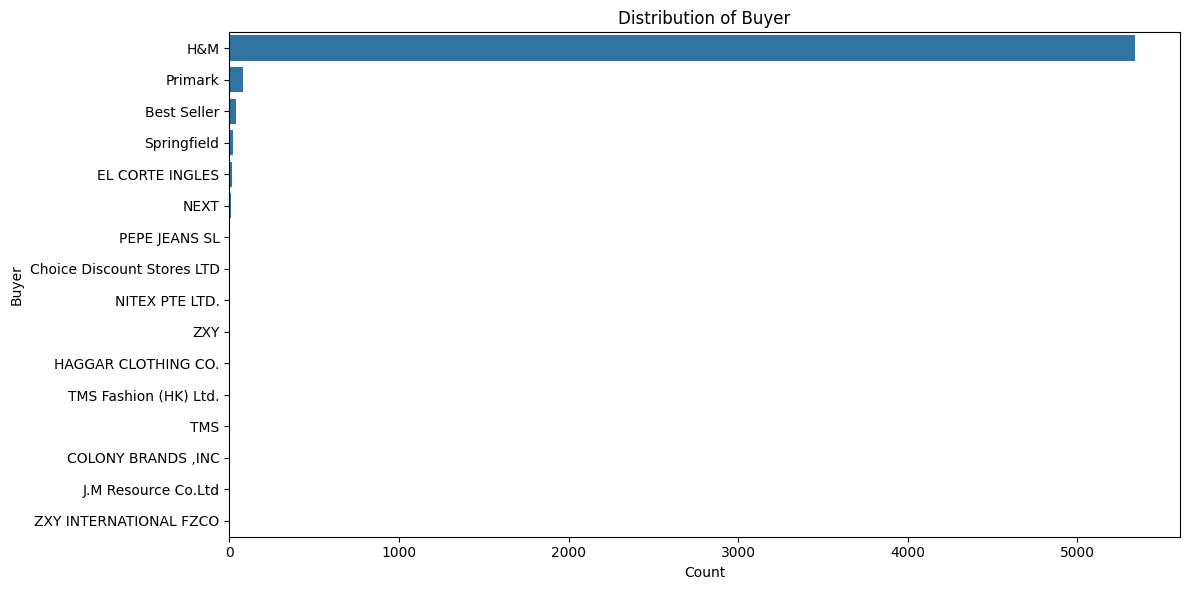

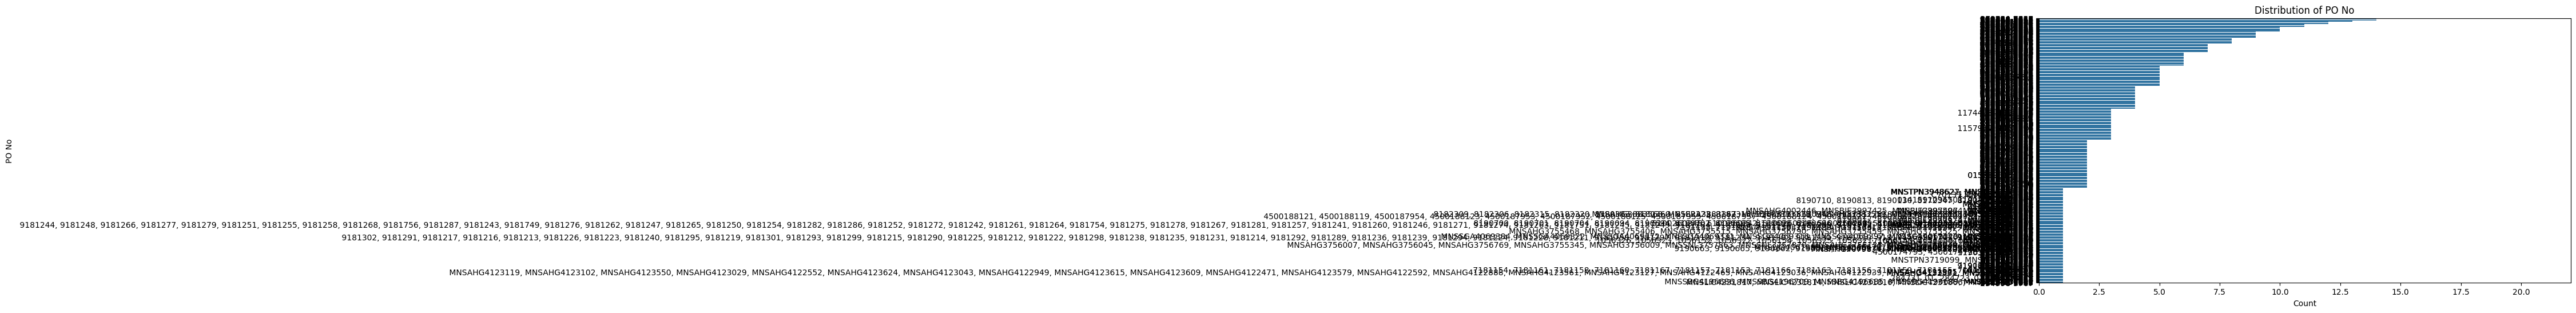

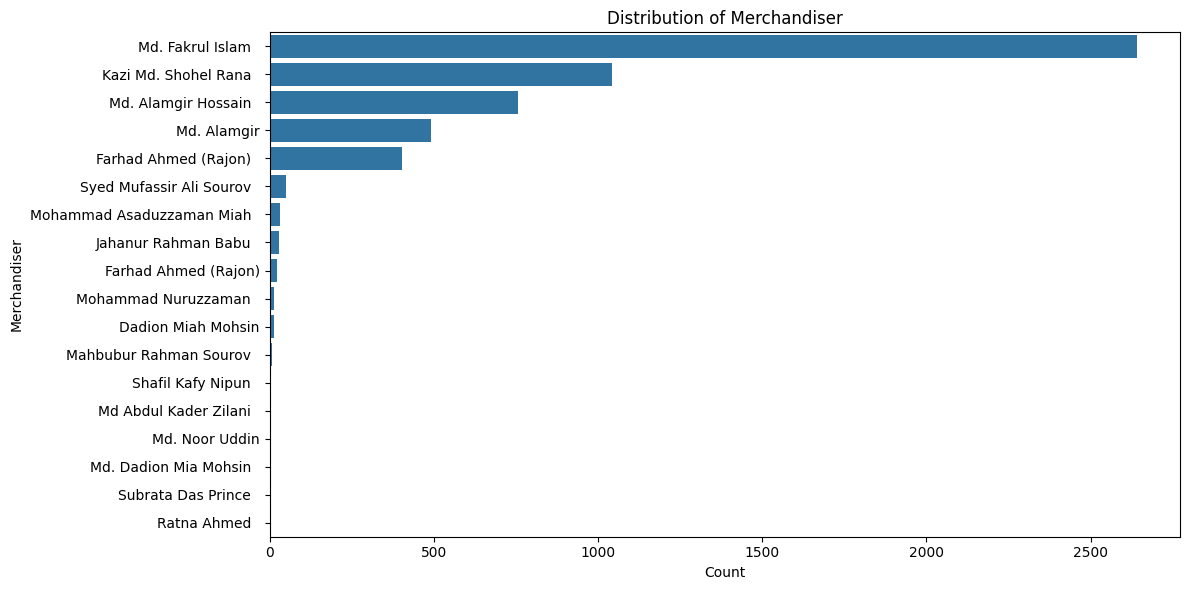

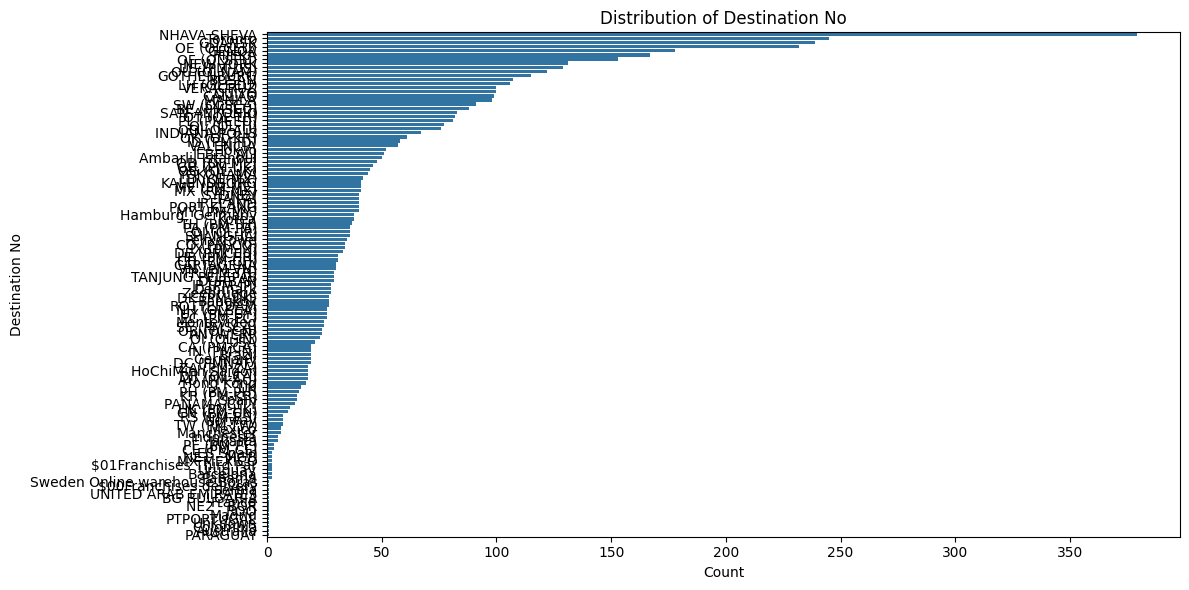

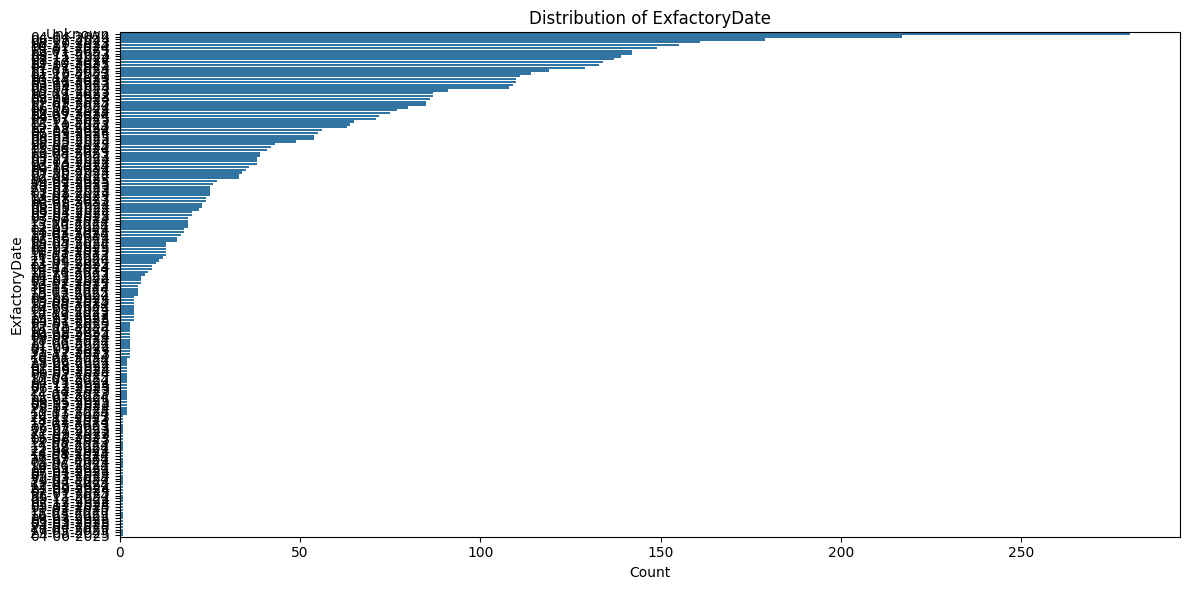

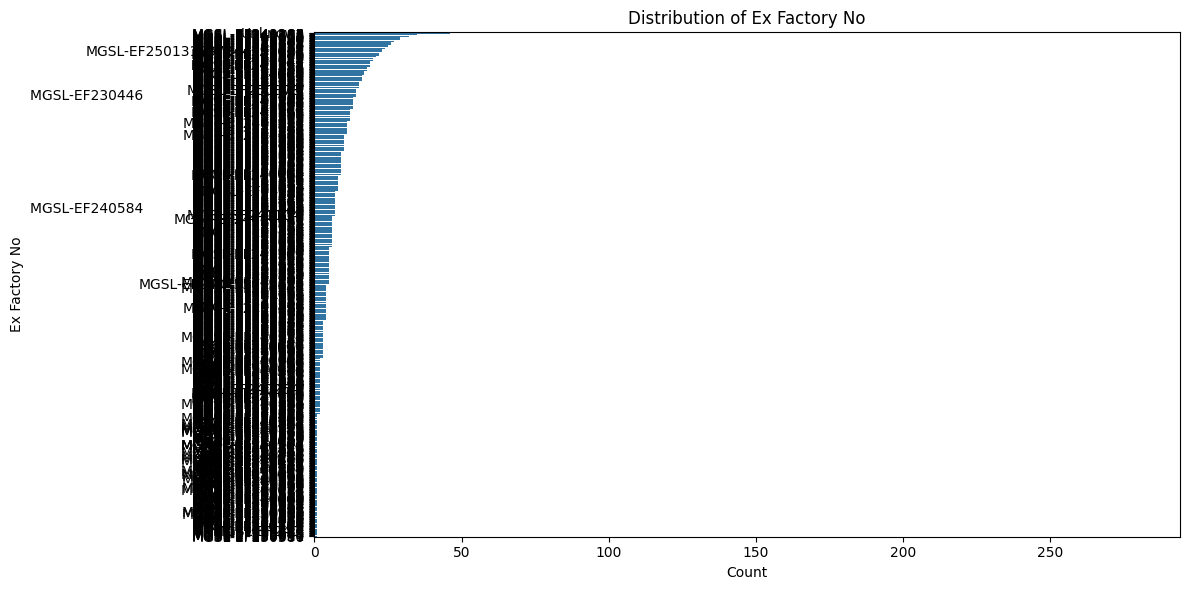

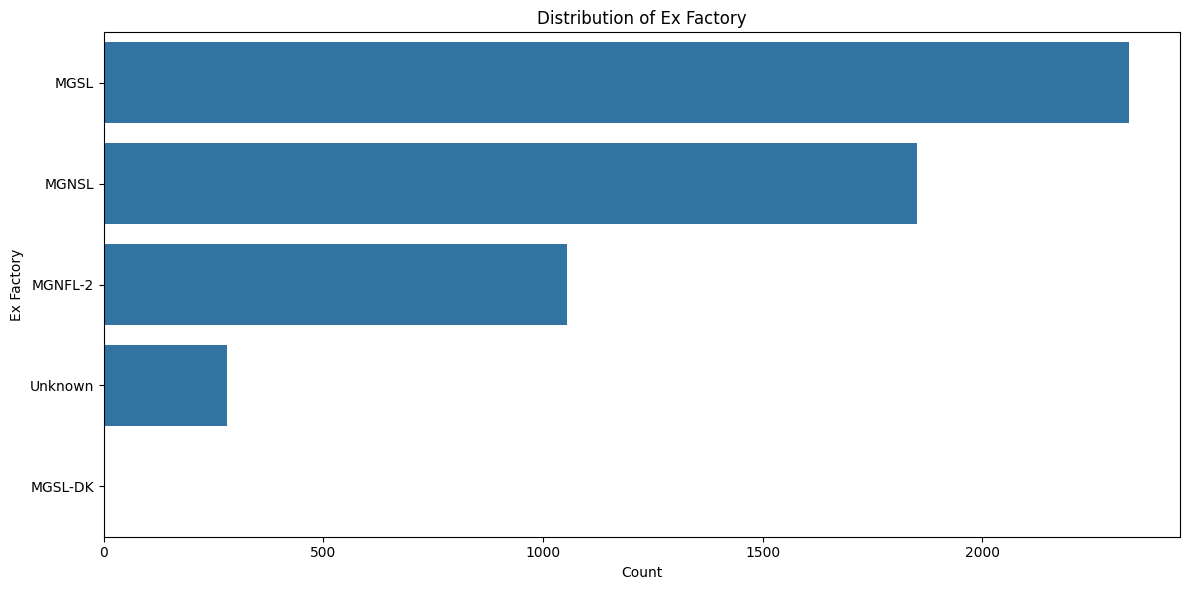

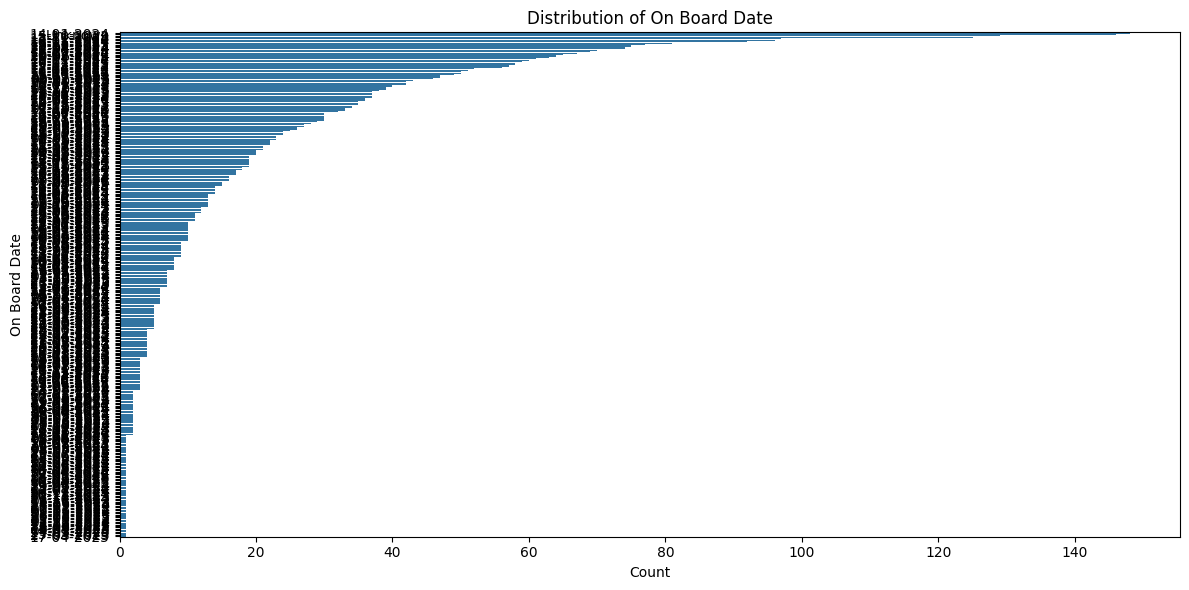

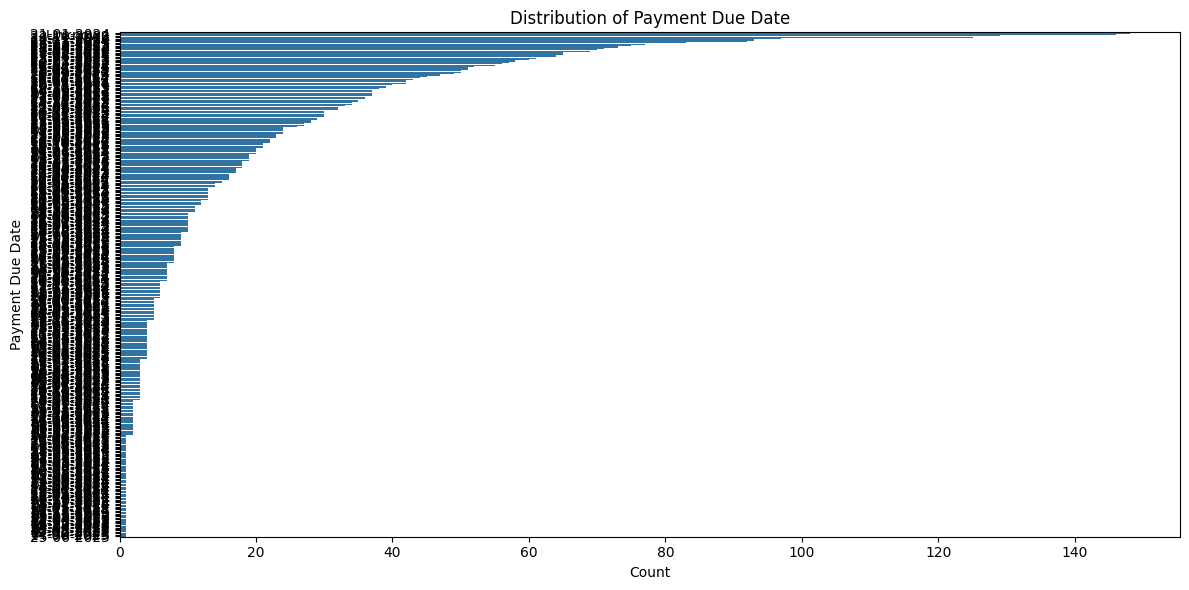

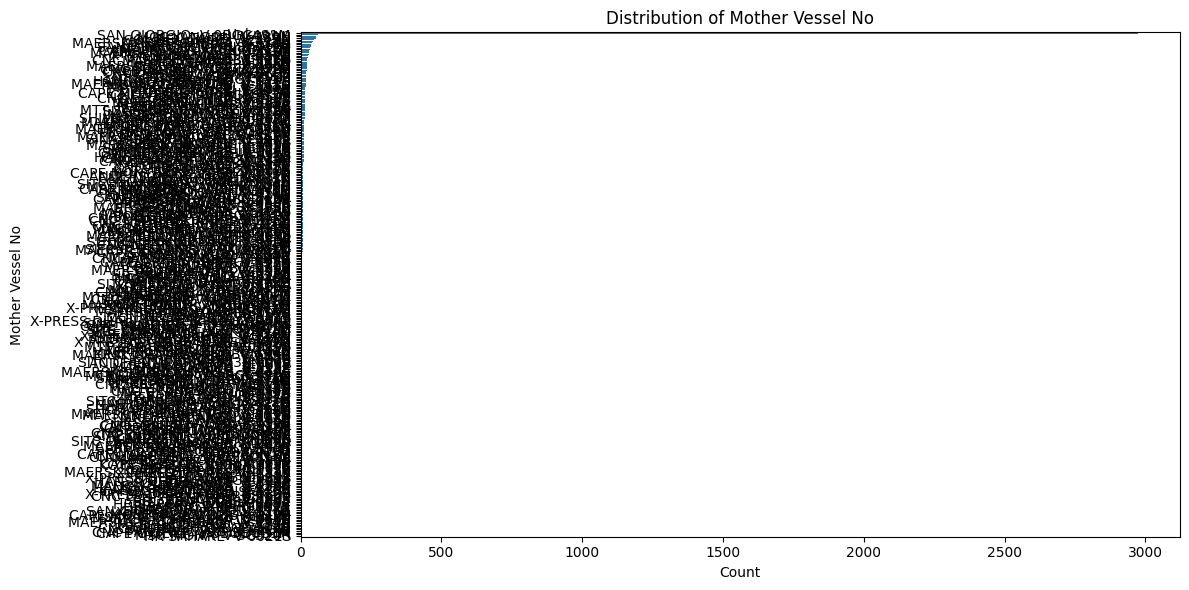

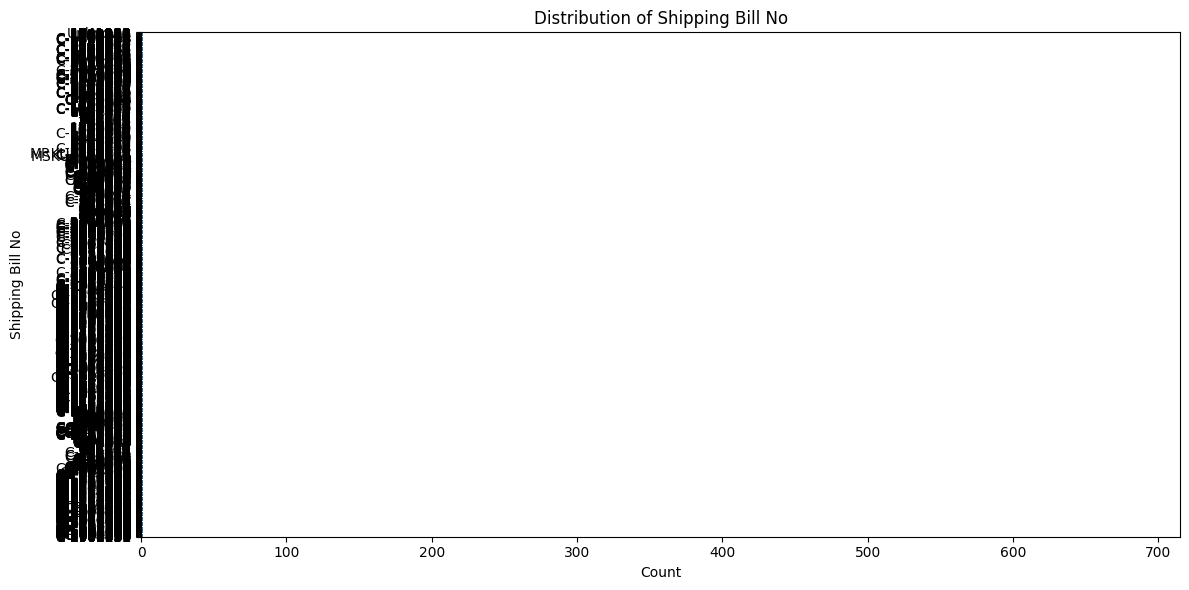

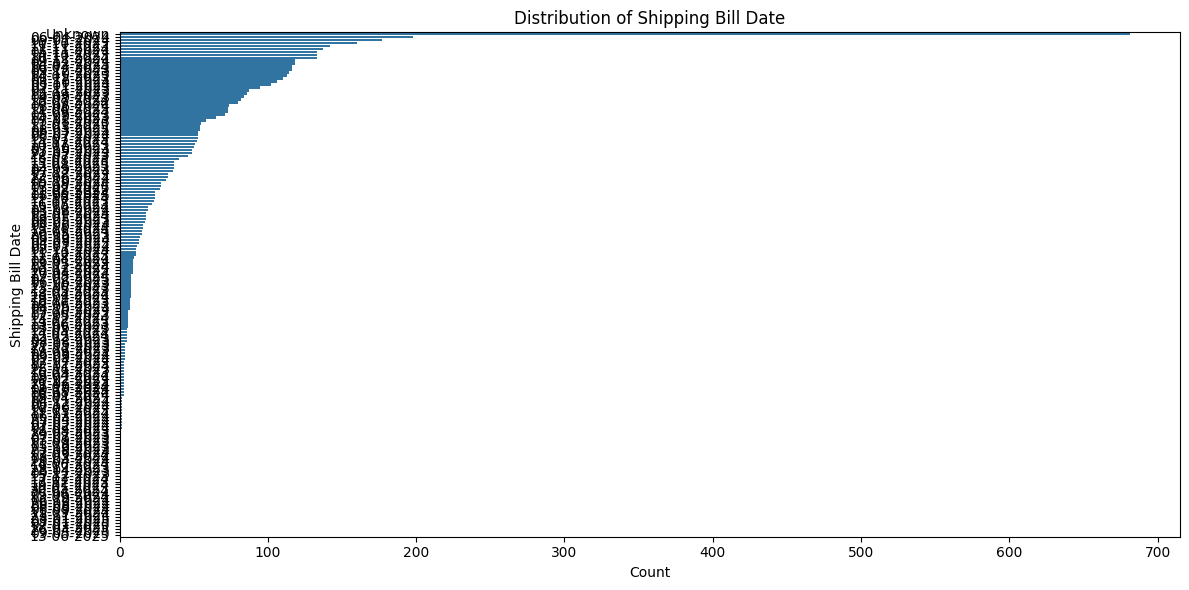

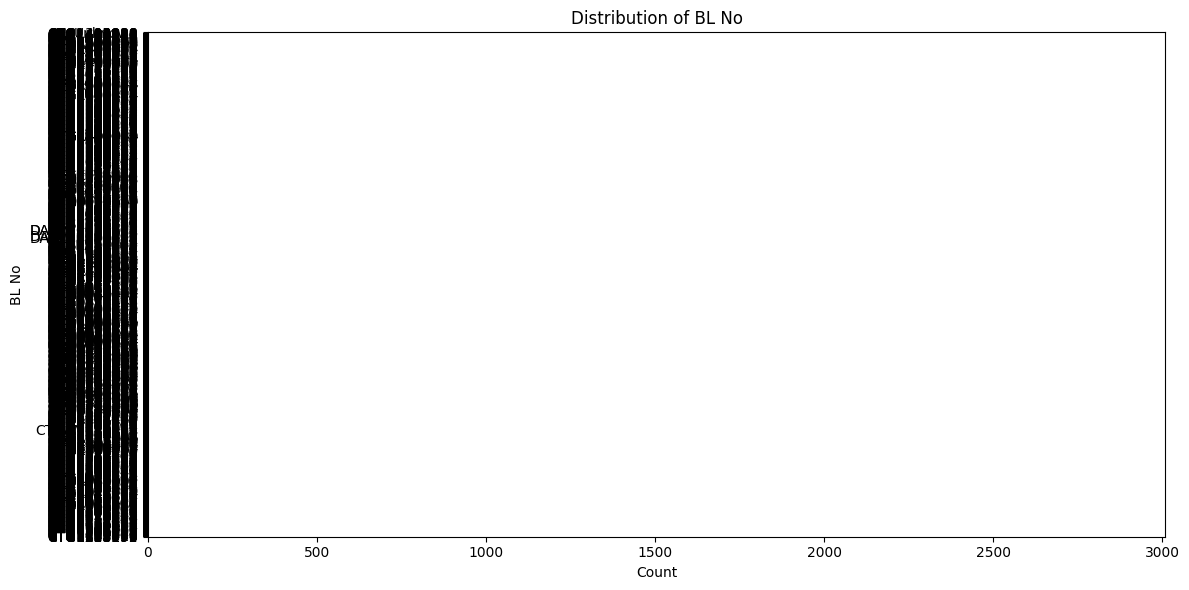

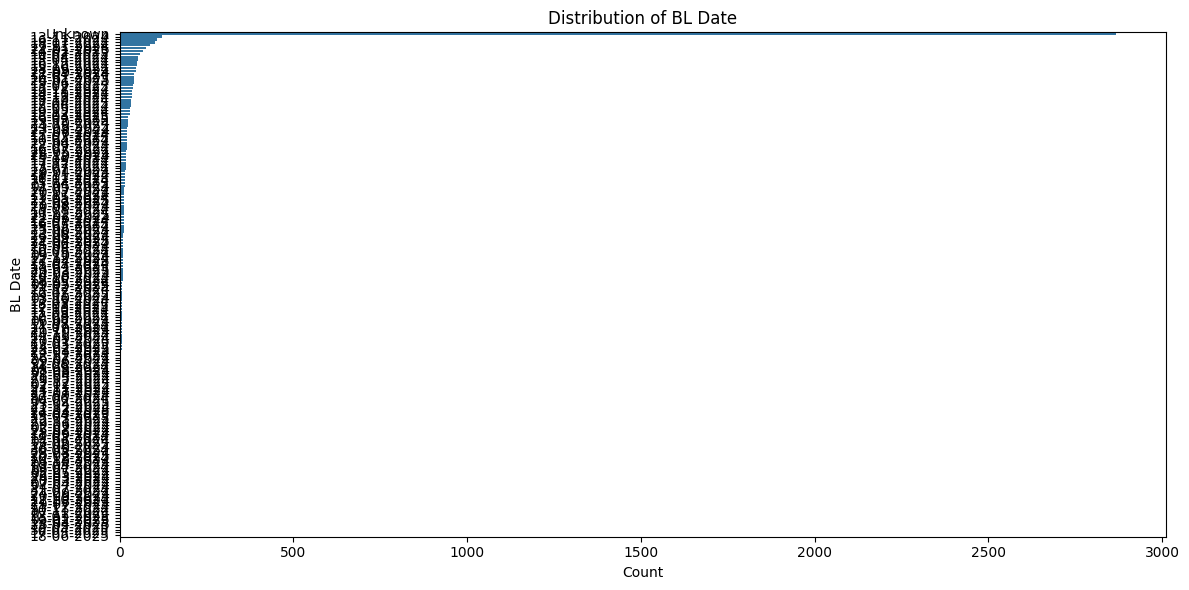

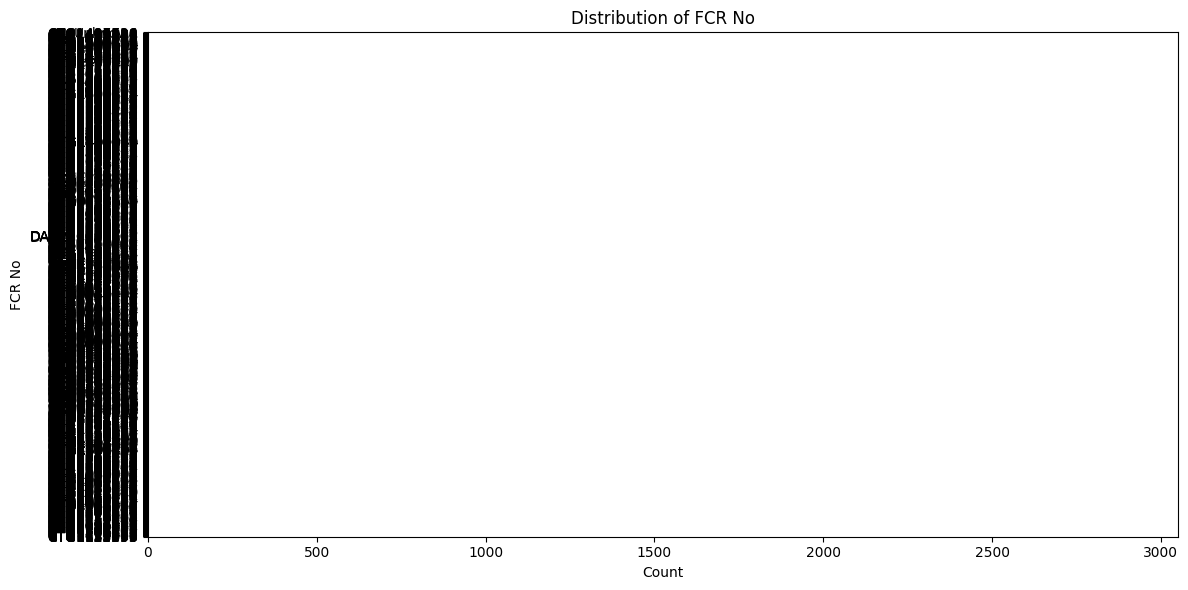

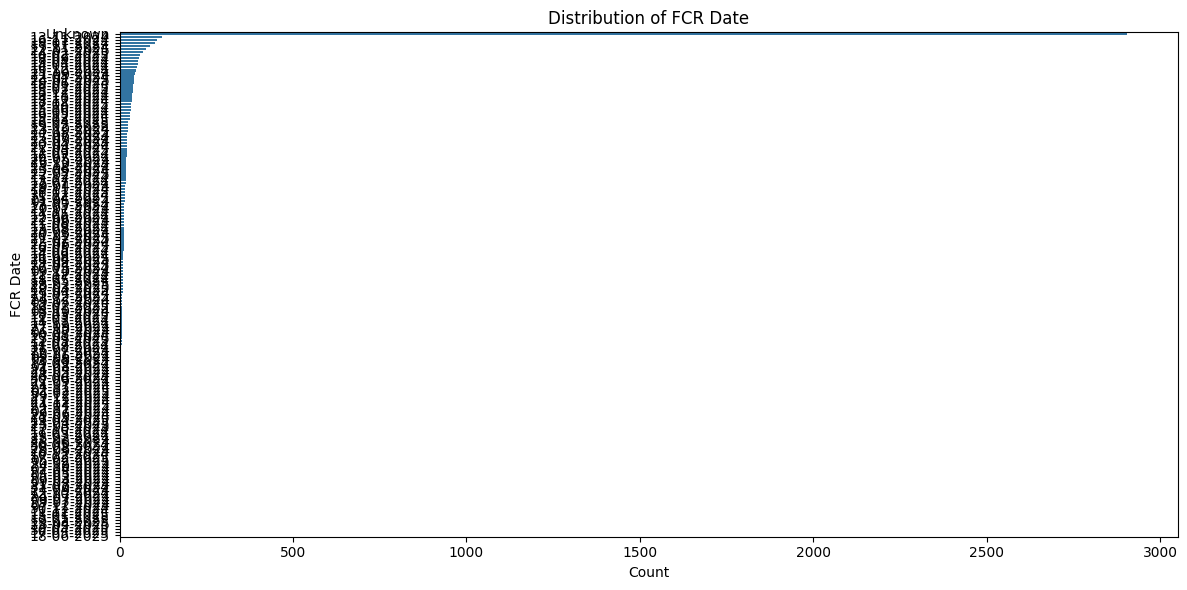

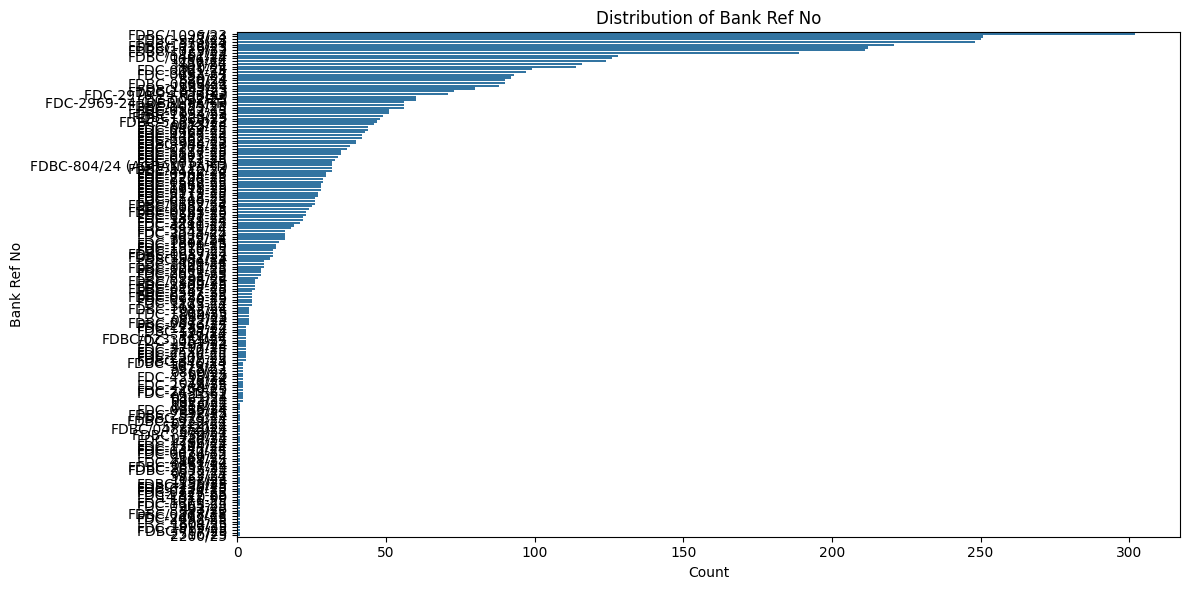

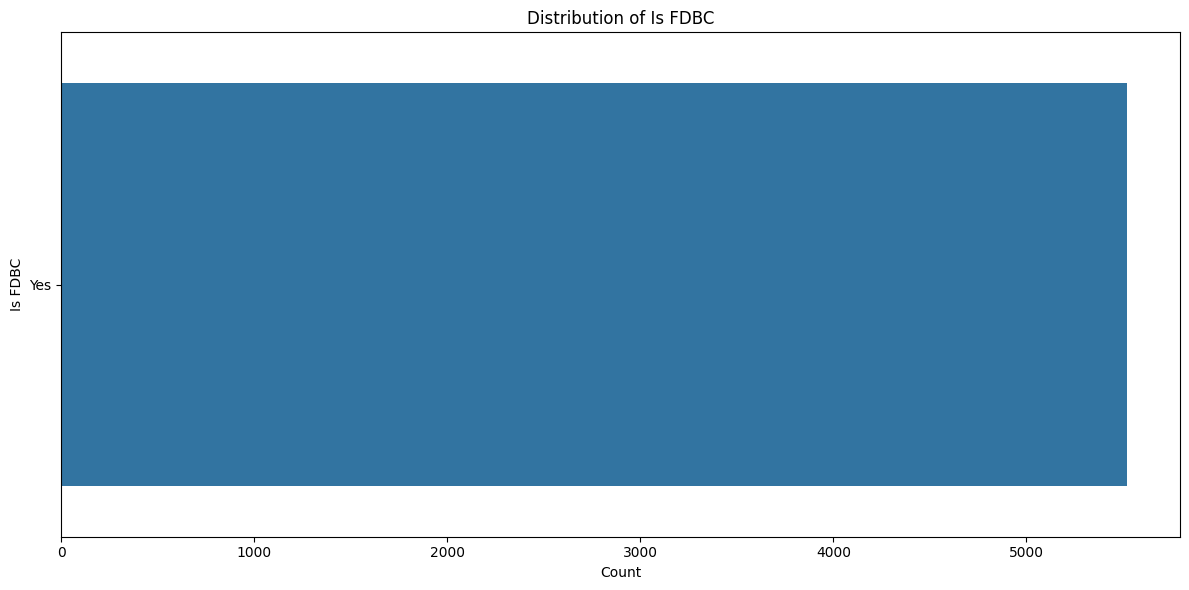

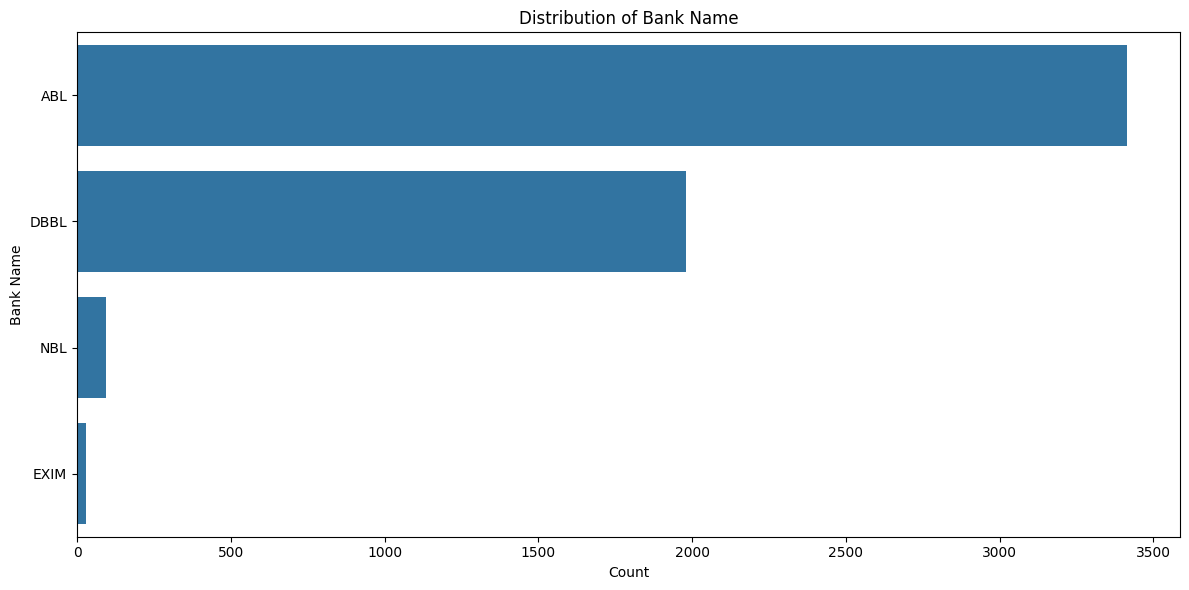

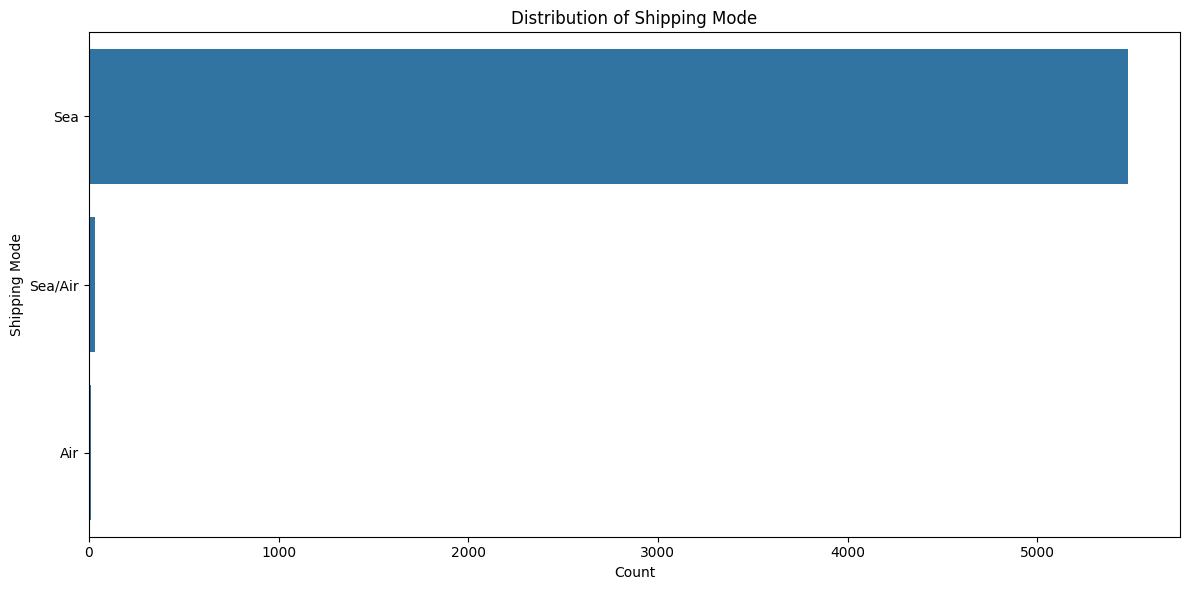

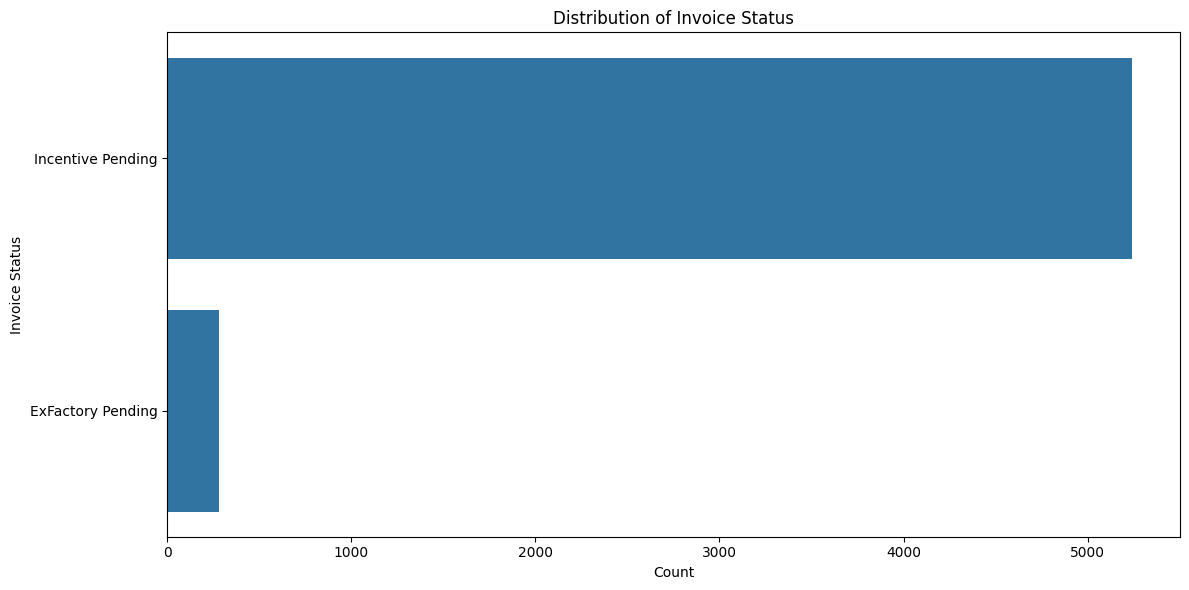

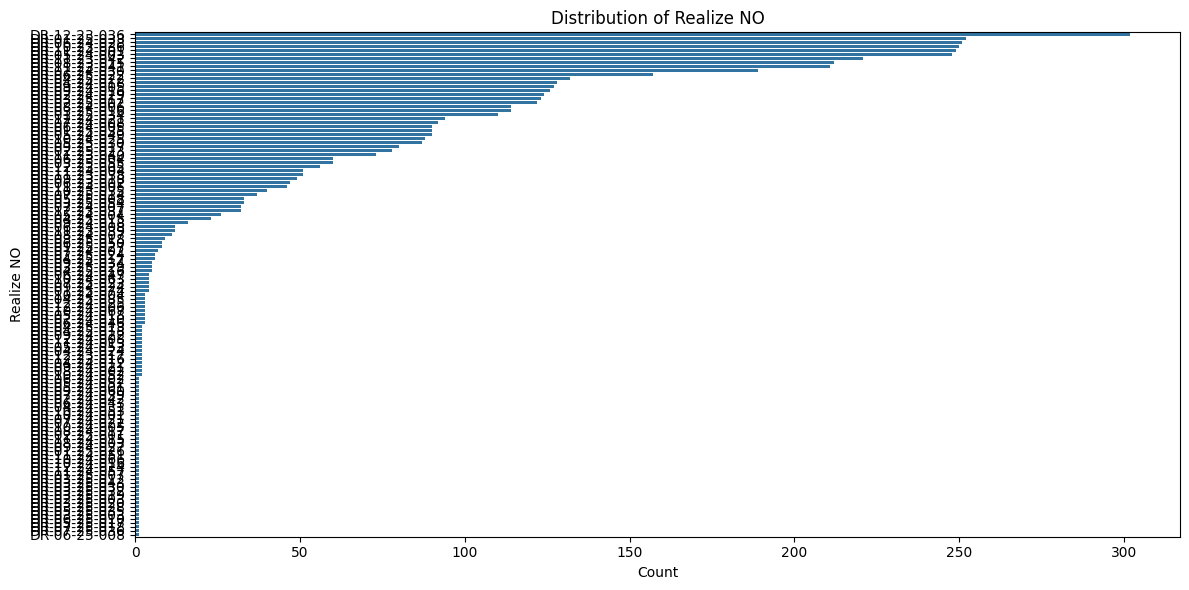

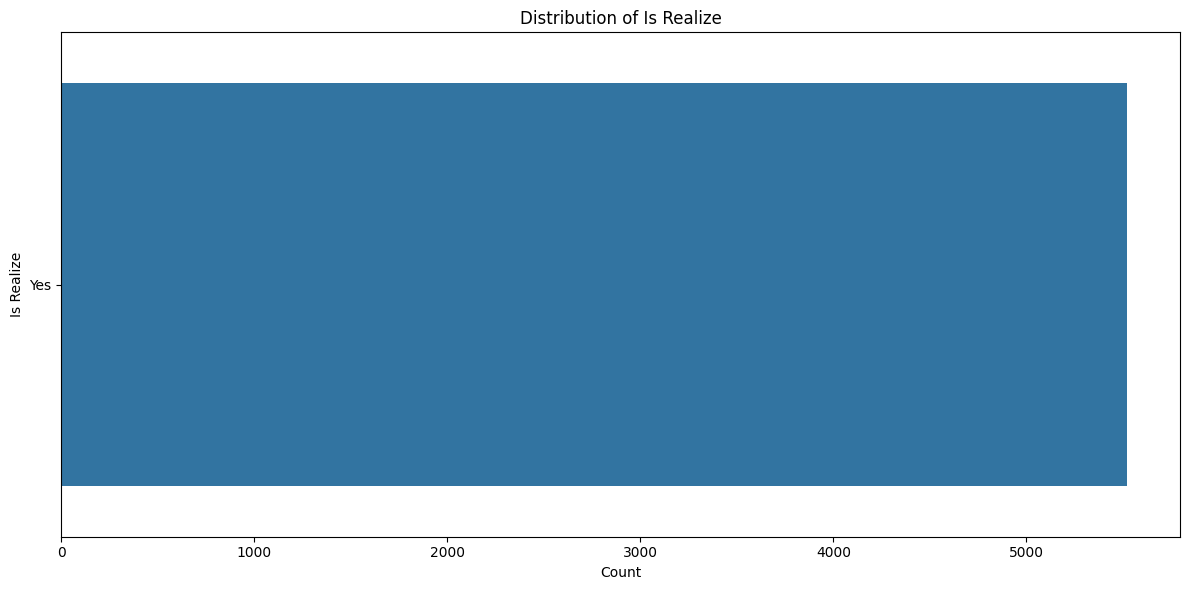

In [40]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Create count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Explore relationships

### Subtask:
Investigate the relationships between features using correlation matrices, scatter plots, or other relevant visualizations to identify potential patterns or dependencies.


**Reasoning**:
Calculate the correlation matrix for numerical columns and create a heatmap to visualize the correlations. Select pairs with significant correlations and create scatter plots.



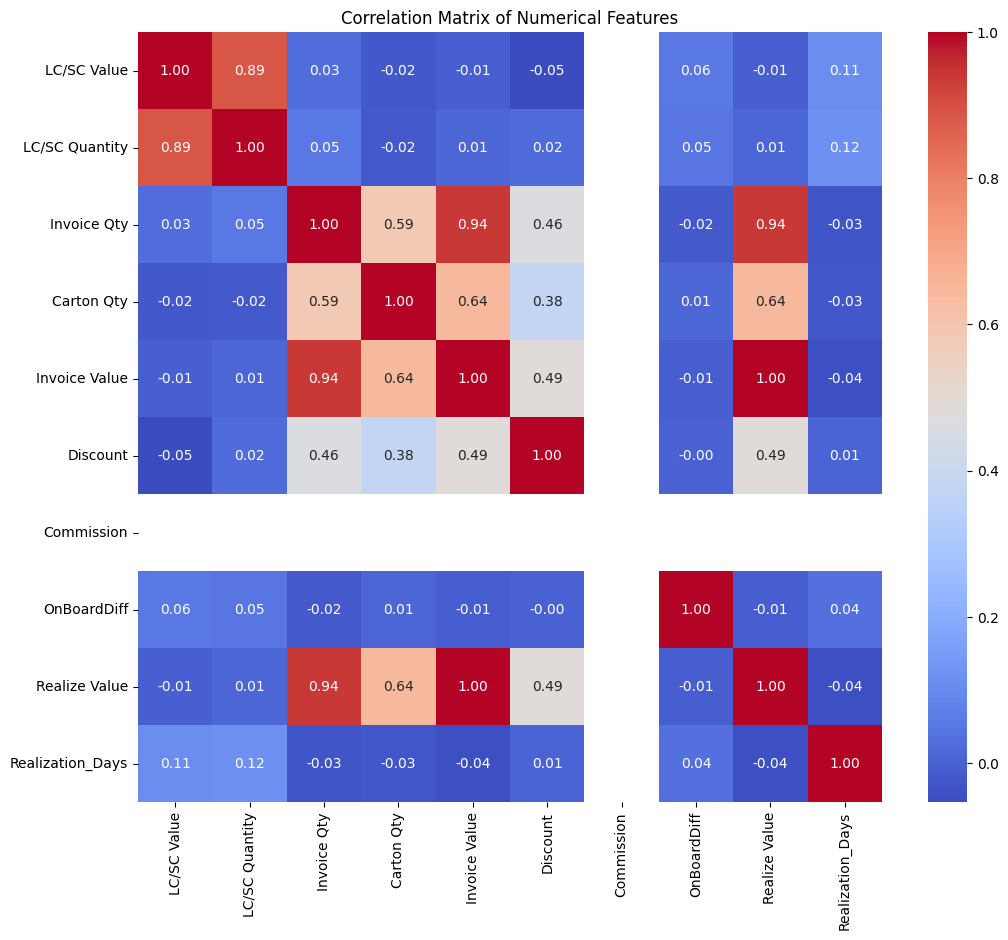


Pairs of numerical features with significant correlations (> 0.5 or < -0.5):
Realize Value   Invoice Value    1.000000
Invoice Value   Invoice Qty      0.941115
Realize Value   Invoice Qty      0.941114
LC/SC Quantity  LC/SC Value      0.887974
Realize Value   Carton Qty       0.642155
Invoice Value   Carton Qty       0.642155
Carton Qty      Invoice Qty      0.587022
dtype: float64


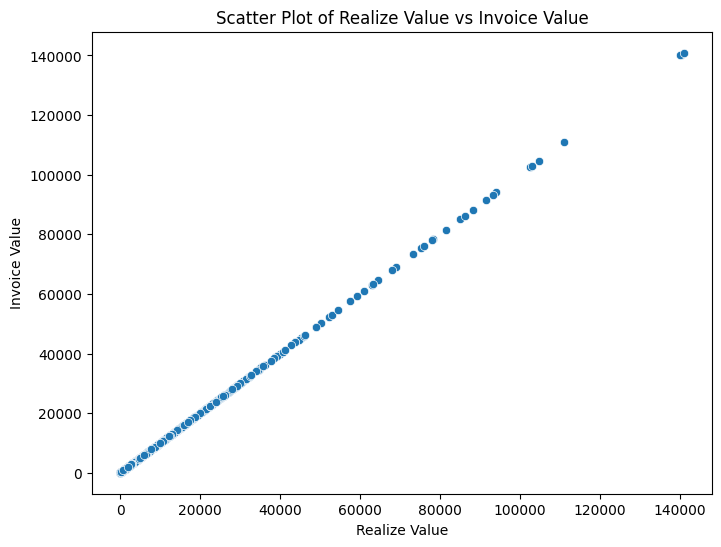

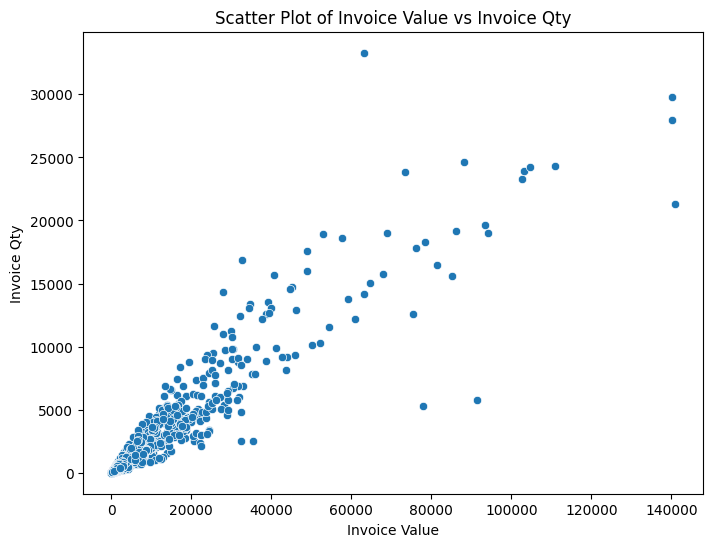

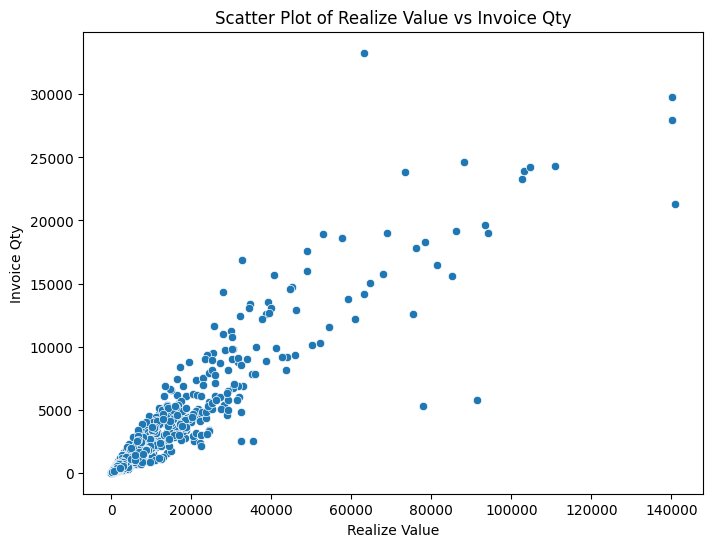

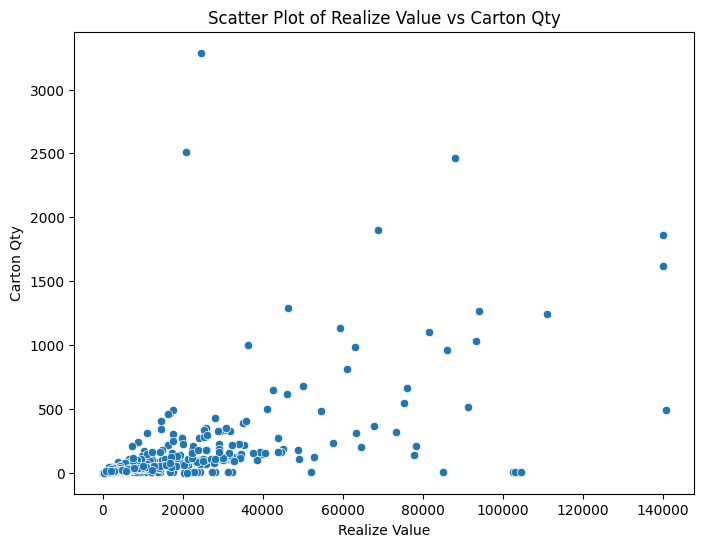

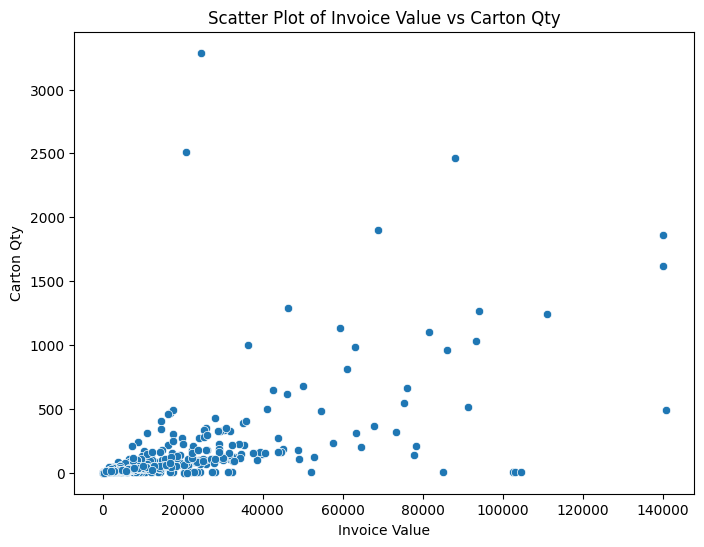

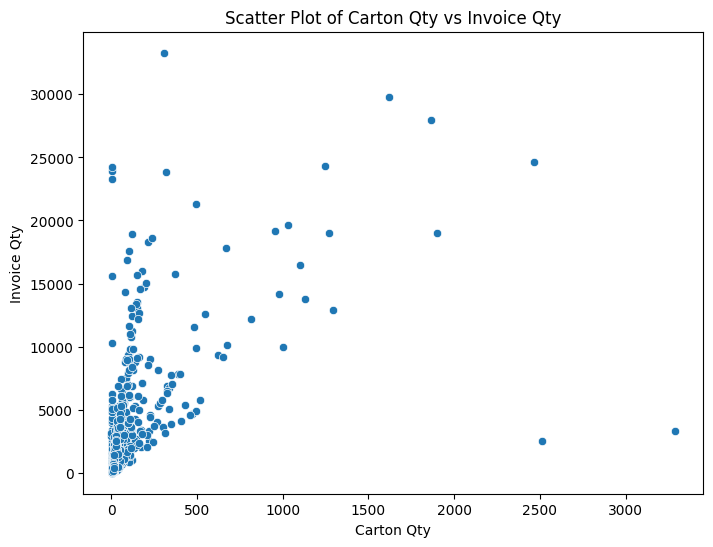

In [41]:
# Calculate correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Select pairs with significant correlations (e.g., absolute correlation > 0.5)
# Extract the upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs with absolute correlation greater than 0.5
significant_correlations = upper.unstack().sort_values(ascending=False)
significant_correlations = significant_correlations[abs(significant_correlations) > 0.5]

print("\nPairs of numerical features with significant correlations (> 0.5 or < -0.5):")
print(significant_correlations)

# Select a few pairs from the significant correlations for scatter plots
# Choosing the top positive and top negative correlations (excluding self-correlations and duplicates)
pairs_to_plot = significant_correlations.head(3).index.tolist() + significant_correlations.tail(3).index.tolist()

# Create scatter plots for selected pairs
for col1, col2 in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

## Identify outliers

### Subtask:
Use visualizations and statistical methods to identify and understand outliers in the data.


**Reasoning**:
Identify potential outliers visually from the box plots and then quantify them using the IQR method for the identified numerical columns.



In [42]:
# Revisit the box plots and identify columns with potential outliers visually.
# Based on the previous box plot visualizations, the following numerical columns appear to have potential outliers:
outlier_cols = ['LC/SC Value', 'LC/SC Quantity', 'Invoice Qty', 'Carton Qty',
                'Invoice Value', 'Discount', 'OnBoardDiff', 'Realize Value', 'Realization_Days']

print("Analyzing outliers using IQR method for the following columns:")
print(outlier_cols)

# For each identified numerical column, quantify outliers using the IQR method.
outlier_counts = {}
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Count outliers
    outlier_count = outliers.shape[0]
    outlier_counts[col] = outlier_count

# Print the count of outliers for each analyzed numerical column.
print("\nNumber of outliers per column (using IQR method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Analyzing outliers using IQR method for the following columns:
['LC/SC Value', 'LC/SC Quantity', 'Invoice Qty', 'Carton Qty', 'Invoice Value', 'Discount', 'OnBoardDiff', 'Realize Value', 'Realization_Days']

Number of outliers per column (using IQR method):
LC/SC Value: 0
LC/SC Quantity: 19
Invoice Qty: 707
Carton Qty: 692
Invoice Value: 733
Discount: 89
OnBoardDiff: 570
Realize Value: 733
Realization_Days: 127


## Handle outliers

### Subtask:
Decide on a strategy to handle outliers, such as removing them or transforming the data, based on the analysis.


**Reasoning**:
Analyze the outlier counts and distributions to determine the best strategy for handling outliers in each column. Based on the analysis, implement the chosen strategies.



In [43]:
# Re-examine outlier counts
print("Number of outliers per column (using IQR method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Determine strategy based on outlier counts and context
# - Columns with a small number of outliers (e.g., < 5% of the data) and potentially genuine values might be kept.
# - Columns with a moderate number of outliers where they might skew analysis could be considered for removal or transformation.
# - Columns with a high number of outliers might indicate that the outliers are not errors but part of the natural variability, suggesting transformation might be more appropriate than removal.

# Let's calculate outlier percentage
outlier_percentages = {col: (count / len(df)) * 100 for col, count in outlier_counts.items()}
print("\nPercentage of outliers per column:")
for col, percentage in outlier_percentages.items():
    print(f"{col}: {percentage:.2f}%")

# Based on outlier percentages and the nature of the columns:
# - 'LC/SC Quantity', 'Discount', 'Realization_Days' have a relatively small percentage of outliers.
# - 'Invoice Qty', 'Carton Qty', 'Invoice Value', 'OnBoardDiff', 'Realize Value' have a higher percentage of outliers.
# Given that some of these columns represent quantities or financial values, extreme values might be genuine.
# Removing outliers for columns with a higher percentage might lead to significant data loss.
# For financial and quantity data, outliers can be valid transactions or large orders.
# For 'OnBoardDiff' and 'Realization_Days', extreme values might indicate unusual delays or efficiencies.

# Strategy:
# - For columns with a small number of outliers and where they might represent valid, though extreme, cases ('LC/SC Quantity', 'Discount', 'Realization_Days'), we will keep them for now. Further domain knowledge might be needed to decide on removal or transformation.
# - For columns with a higher number of outliers ('Invoice Qty', 'Carton Qty', 'Invoice Value', 'OnBoardDiff', 'Realize Value'), we will consider applying a transformation if the distribution is skewed, as removing a large number of rows could be detrimental.
# - 'LC/SC Value' has 0 outliers according to IQR.

# Let's look at the skewness of the columns with higher outlier percentages
skewed_cols = ['Invoice Qty', 'Carton Qty', 'Invoice Value', 'OnBoardDiff', 'Realize Value']
print("\nSkewness of columns with potential for transformation:")
print(df[skewed_cols].skew())

# 'Invoice Qty', 'Carton Qty', 'Invoice Value', 'Realize Value' show significant positive skewness.
# 'OnBoardDiff' shows negative skewness.
# A log transformation is suitable for positively skewed data. For negatively skewed data, other transformations like squaring or cubing might be considered, or simply addressing the outliers might suffice.

# For positively skewed columns with outliers, apply a log transformation (add 1 to handle zeros if any)
for col in ['Invoice Qty', 'Carton Qty', 'Invoice Value', 'Realize Value']:
    # Check for non-negative values before log transformation
    if (df[col] >= 0).all():
        df[col] = np.log1p(df[col])
        print(f"Applied log1p transformation to '{col}'.")
    else:
        print(f"Skipping log transformation for '{col}' due to negative values.")

# For 'OnBoardDiff', the outliers are on the lower end due to negative skewness.
# Removing these might be more appropriate if they represent erroneous negative values (e.g., impossible timelines).
# Let's re-evaluate the negative values in 'OnBoardDiff'
negative_onboarddiff_count = df[df['OnBoardDiff'] < 0].shape[0]
print(f"\nNumber of rows with negative 'OnBoardDiff': {negative_onboarddiff_count}")

# If negative 'OnBoardDiff' values are not logically possible in the business context,
# we could consider removing these rows or treating them as missing and imputing.
# Given the previous cleaning step handled missing values, let's assume negative values are errors and remove those rows.
initial_rows_onboarddiff = len(df)
df = df[df['OnBoardDiff'] >= 0]
rows_after_onboarddiff_handling = len(df)
print(f"Removed {initial_rows_onboarddiff - rows_after_onboarddiff_handling} rows with negative 'OnBoardDiff'.")

# Verify the changes by re-examining descriptive statistics and potentially replotting
print("\nDescriptive statistics after outlier handling:")
display(df[outlier_cols].describe())

# You could also replot the distributions to visually inspect the changes.
# For simplicity in this step, we'll just show the descriptive statistics.

Number of outliers per column (using IQR method):
LC/SC Value: 0
LC/SC Quantity: 19
Invoice Qty: 707
Carton Qty: 692
Invoice Value: 733
Discount: 89
OnBoardDiff: 570
Realize Value: 733
Realization_Days: 127

Percentage of outliers per column:
LC/SC Value: 0.00%
LC/SC Quantity: 0.34%
Invoice Qty: 12.81%
Carton Qty: 12.54%
Invoice Value: 13.28%
Discount: 1.61%
OnBoardDiff: 10.33%
Realize Value: 13.28%
Realization_Days: 2.30%

Skewness of columns with potential for transformation:
Invoice Qty       7.684687
Carton Qty       19.115036
Invoice Value     8.753864
OnBoardDiff     -41.213423
Realize Value     8.753883
dtype: float64
Applied log1p transformation to 'Invoice Qty'.
Applied log1p transformation to 'Carton Qty'.
Applied log1p transformation to 'Invoice Value'.
Applied log1p transformation to 'Realize Value'.

Number of rows with negative 'OnBoardDiff': 18
Removed 18 rows with negative 'OnBoardDiff'.

Descriptive statistics after outlier handling:


LC/SC Value  LC/SC Quantity  Invoice Qty   Carton Qty  Invoice Value  \
count  5.502000e+03    5.502000e+03  5502.000000  5502.000000    5502.000000   
mean   5.855380e+06    1.629251e+06     5.106038     1.605782       6.403757   
std    4.000765e+06    1.320895e+06     1.527951     1.096892       1.566181   
min    2.334450e+03    3.950000e+02     1.609438     0.000000       2.768832   
25%    2.622975e+06    5.015690e+05     4.011838     0.693147       5.368310   
50%    4.509235e+06    1.244813e+06     4.912655     1.098612       6.232419   
75%    7.985363e+06    2.876827e+06     6.089045     2.079442       7.390940   
max    1.255246e+07    9.222800e+06    10.413343     8.098339      11.855898   

          Discount  OnBoardDiff  Realize Value  Realization_Days  
count  5502.000000  5502.000000    5502.000000       5502.000000  
mean     12.831333     8.371320       6.403735         77.674119  
std     177.958428     2.901911       1.566176        192.490180  
min       0.000000     0.000000       2.768832       -302.000000  
25%       0.000000     7.000000       5.368310        -60.000000  
50%       0.000000     8.000000       6.232419         62.000000  
75%       0.000000     9.000000       7.390940        174.000000  
max    7377.730000    40.000000      11.855898        630.000000

## Summary:

### Data Analysis Key Findings

*   Numerical columns like 'LC/SC Value', 'LC/SC Quantity', 'Invoice Qty', 'Carton Qty', 'Invoice Value', 'Discount', 'Commission', 'OnBoardDiff', 'Realize Value', and 'Realization\_Days' have varying central tendencies, dispersions, and distributions, with some showing significant skewness.
*   Categorical columns like 'LC Factory', 'LC/SC No', 'Buyer', 'Merchandiser', 'Destination No', 'Invoice Status', and others have diverse distributions of categories, with some categories being significantly more frequent than others.
*   Strong positive correlations exist between several numerical features, notably:
    *   'Realize Value' and 'Invoice Value' (correlation of 1.00).
    *   'Invoice Value' and 'Invoice Qty' (correlation of 0.94).
    *   'Realize Value' and 'Invoice Qty' (correlation of 0.94).
    *   'LC/SC Quantity' and 'LC/SC Value' (correlation of 0.89).
*   Outliers were identified using the IQR method, with a significant number present in 'Invoice Qty' (707), 'Carton Qty' (692), 'Invoice Value' (733), 'OnBoardDiff' (570), and 'Realize Value' (733).
*   'Invoice Qty', 'Carton Qty', 'Invoice Value', and 'Realize Value' showed significant positive skewness, while 'OnBoardDiff' showed negative skewness.
*   18 rows contained negative values in the 'OnBoardDiff' column.

### Insights or Next Steps

*   The strong correlations between invoice and realization values/quantities suggest a close relationship, which is expected but confirms data consistency. Further investigation into deviations from this pattern (e.g., cases where Realize Value is significantly different from Invoice Value) could be insightful.
*   The presence of a high percentage of outliers and significant skewness in key financial and quantity columns indicates that models sensitive to distribution and extreme values may require further data transformation or robust methods. The negative 'OnBoardDiff' values, after removal, highlight potential data quality issues in recording timelines.
